![miad4.png](Archivos/miad4.png)

# Laboratorio 2

## Desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Para el desarrollo de esta actividad puedes utilizar cualquier librería externa. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos utilizando métodos de librerías especializadas.
3. Explorar, modificar, limpiar y unir objetos tablas de datos.
4. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
5. Implementar análisis basado en modelos estadísticos o de *machine learning*.

##  Contexto: desigualdad y factores de éxito en pruebas Saber 11 en Colombia

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas Saber 11, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (ej., matemáticas, física, inglés, etc.) y se lleva a cabo dos veces al año, ajustándose a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes diligencian un formulario que recoge información sociodemográfica y relacionada con la institución a la que pertenecen. El fin es obtener información con respecto al desempeño de los estudiantes en la prueba y de sus características.

![msaberpro.png](Archivos/saberpro.png)

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es la desigualdad y factores de éxito en las pruebas Saber 11. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus características principales y seleccionar las partes de dicho contenido que podrían ser relevantes para el análisis.


* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones y estadísticas descriptivas.


* Proponer un modelo que busque relacionar las variables de interés con el desempeño de los estudiantes y concluir acerca de los posibles hallazgos que se podrían reportar para el *stakeholder*.


* Generar una herramienta que permita a un usuario interactuar con alguno de los parámetros del análisis realizado de forma relevante en el contexto del problema.

## Fase 1: obtener e inspeccionar archivos

En esta fase te harás una idea general del contenido de los datos y generarás un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Además, seleccionarás un segmento de los datos que consideres útil para realizar tu análisis.

Pautas generales:

* Utilizar una librería especializada para leer los archivos de datos y agregarlos según sea necesario (ej., utilizando los métodos `append` o `concat` si eliges cargarlos utilizando la librería `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables según su tipo (ej., numéricas, categóricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problemática de interés.

Preguntas guía:

* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

In [1]:
import pandas as pd
from sodapy import Socrata
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##### CARGUE DE DATOS USANDO API --> Se probo que funciona correcatmente el cargue de archivos usando API (Tiempo aproximado de cargue de datos 15 minutos)

#codigos = {"2020-20":"rnvb-vnyh",
#         "2019-20":"ynam-yc42"}

#cliente = Socrata("www.datos.gov.co", None)
#datos = {}
#for periodo, codigo in codigos.items():
#    datos[periodo] = pd.DataFrame.from_records(cliente.get(codigo, limit= 1000000))

#df1=  datos["2019-20"]
#df2 = datos["2020-20"]

# Union de los DataFrames de 2019 y 2020
#df = pd.concat([df1, df2])

#print("El dataframe del año 2019 tiene " + str(df1.shape[0]) + " filas y " +  str(df1.shape[1]) + " columnas")
#print("El dataframe del año 2020 tiene " + str(df2.shape[0]) + " filas y " +  str(df2.shape[1])+ " columnas")

##### CARGUE DE DATOS LEYENDO ARCHIVO CSV
archivo_2019_csv = "Saber_11__2019-2_20240212-2.csv"
archivo_2020_csv = "Saber_11__2020-2_20240218-2.csv"

df1 = pd.read_csv(archivo_2019_csv)
df2 = pd.read_csv(archivo_2020_csv)

print("El dataframe del año 2019 tiene " + str(df1.shape[0]) + " filas y " +  str(df1.shape[1]) + " columnas")
print("El dataframe del año 2020 tiene " + str(df2.shape[0]) + " filas y " +  str(df2.shape[1])+ " columnas")

/var/folders/4t/gjw0glxj55s27z96j8ljprn40000gs/T/ipykernel_75715/4114259076.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/var/folders/4t/gjw0glxj55s27z96j8ljprn40000gs/T/ipykernel_75715/4114259076.py:31: DtypeWarning: Columns (76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(archivo_2019_csv)


El dataframe del año 2019 tiene 27301 filas y 82 columnas
El dataframe del año 2020 tiene 25253 filas y 82 columnas


In [2]:
# Union de los DataFrames de 2019 y 2020
df = pd.concat([df1, df2])
print("El numero de filas del dataframe es : " + str((df.shape)[0]) +  " y el numero de columnas es : " + str((df.shape)[1]))
df.head()

El numero de filas del dataframe es : 52554 y el numero de columnas es : 82


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/22/2002 12:00:00 AM,20194,SB11201940127564,ESTUDIANTE,No,COLOMBIA,-,...,27.0,2,A-,181,10,51.7332626228867,3.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD
1,TI,COLOMBIA,F,06/06/2003 12:00:00 AM,20194,SB11201940157174,ESTUDIANTE,No,COLOMBIA,-,...,74.0,97,B1,325,93,61.6524635584418,3.0,4.0,PUBLICAR,NO
2,TI,COLOMBIA,F,10/27/2002 12:00:00 AM,20194,SB11201940492704,ESTUDIANTE,No,COLOMBIA,-,...,50.0,57,A1,322,92,63.0665015931033,3.0,3.0,PUBLICAR,NO
3,TI,COLOMBIA,F,03/29/2002 12:00:00 AM,20194,SB11201940085968,ESTUDIANTE,No,COLOMBIA,-,...,49.0,55,A1,252,56,53.1013653463252,3.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
4,CC,COLOMBIA,M,06/18/2000 12:00:00 AM,20194,SB11201940454081,ESTUDIANTE,No,COLOMBIA,-,...,63.0,88,A2,279,73,41.4879164414922,2.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD


In [3]:
#Descripcion variables numericas
columnas_numericas = ['PERIODO', 'COLE_CODIGO_ICFES', 'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE', 'COLE_COD_MCPIO_UBICACION', 'COLE_COD_DEPTO_UBICACION','ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION', 'PUNT_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA','PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS', 'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES','PUNT_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PERCENTIL_INGLES', 'PUNT_GLOBAL', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_ESTABLECIMIENTO']
print("Los años y periodos que se evaluan en el dataframe son:  " + str(df['PERIODO'].unique()))
# Descripcion variables numericas
print("Descripcion variables numericas")
df[columnas_numericas].describe()

Los años y periodos que se evaluan en el dataframe son:  [20194 20204]
Descripcion variables numericas


,PERIODO,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,...,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,ESTU_NSE_ESTABLECIMIENTO
count,52554.000000,52554.000000,5.255400e+04,5.255400e+04,52554.000000,52554.000000,52541.000000,52541.000000,52554.000000,52554.000000,...,52554.000000,52554.000000,52554.000000,52554.000000,52554.000000,52554.000000,52537.000000,52554.000000,52554.000000,52547.000000
mean,20198.805153,242327.592476,2.024617e+11,2.030894e+11,32581.710774,32.343000,32593.934128,32.373841,52.247916,50.399018,...,48.291567,50.371389,2.021159,47.246375,50.361419,1.961297,47.710547,50.126365,247.602904,2.398367
std,4.996250,264376.796834,9.172167e+10,9.271437e+10,26316.227572,26.289529,26383.148714,26.354861,10.354790,28.954674,...,10.668589,28.951169,0.759673,12.111179,28.941773,0.825304,12.027014,28.980165,50.199104,0.675010
min,20194.000000,75.000000,1.050010e+11,1.050010e+11,5001.000000,5.000000,5001.000000,5.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,20194.000000,51870.000000,1.170010e+11,1.170010e+11,11001.000000,11.000000,11001.000000,11.000000,45.000000,25.000000,...,40.000000,25.000000,1.000000,38.000000,25.000000,1.000000,39.000000,25.000000,209.000000,2.000000
50%,20194.000000,125286.000000,1.730010e+11,1.730125e+11,20400.000000,20.000000,20178.000000,20.000000,52.000000,50.000000,...,48.000000,50.000000,2.000000,46.000000,50.000000,2.000000,46.000000,50.000000,244.000000,2.000000
75%,20204.000000,303727.000000,3.050010e+11,3.050010e+11,54001.000000,54.000000,54001.000000,54.000000,60.000000,76.000000,...,56.000000,75.000000,3.000000,56.000000,75.000000,3.000000,55.000000,75.000000,283.000000,3.000000
max,20204.000000,752345.000000,8.548740e+11,8.548740e+11,99773.000000,99.000000,99773.000000,99.000000,100.000000,100.000000,...,100.000000,100.000000,4.000000,100.000000,100.000000,4.000000,100.000000,100.000000,491.000000,4.000000


Se puede observar que los puntajes (variable PUNT_GLOBAL) tiene como media 247.6 y desviacion estandar 50.1. El valor maximo de los promedios obtenidos es de 491 y un valor minimo de 0. Adicionalmente podemos evidenciar que el 75% de los puntajes estan por debajo de 283. 
Adicionalmente hay variables numericas que pueden incluirse en otras variables como lo son COLE_COD_MCPIO_UBICACION y COLE_COD_DEPTO_UBICACION donde podemos decir que el municipio es una variable que da mas detalle dentro del departamento, sin embargo inicialmente podria considerarse solo el departamento para hacer un analisis y si se identifica una relacion fuerte con el departamento y el resultado del examen, ya se podria luego detallar el municipio.
De igual forma podemos indicar que la variable PUNT_GLOBAL contiene los valores de las variables PUNT_LECTURA_CRITICA, PUNT_C_NATURALES	, PUNT_SOCIALES_CIUDADANAS y PUNT_INGLES.

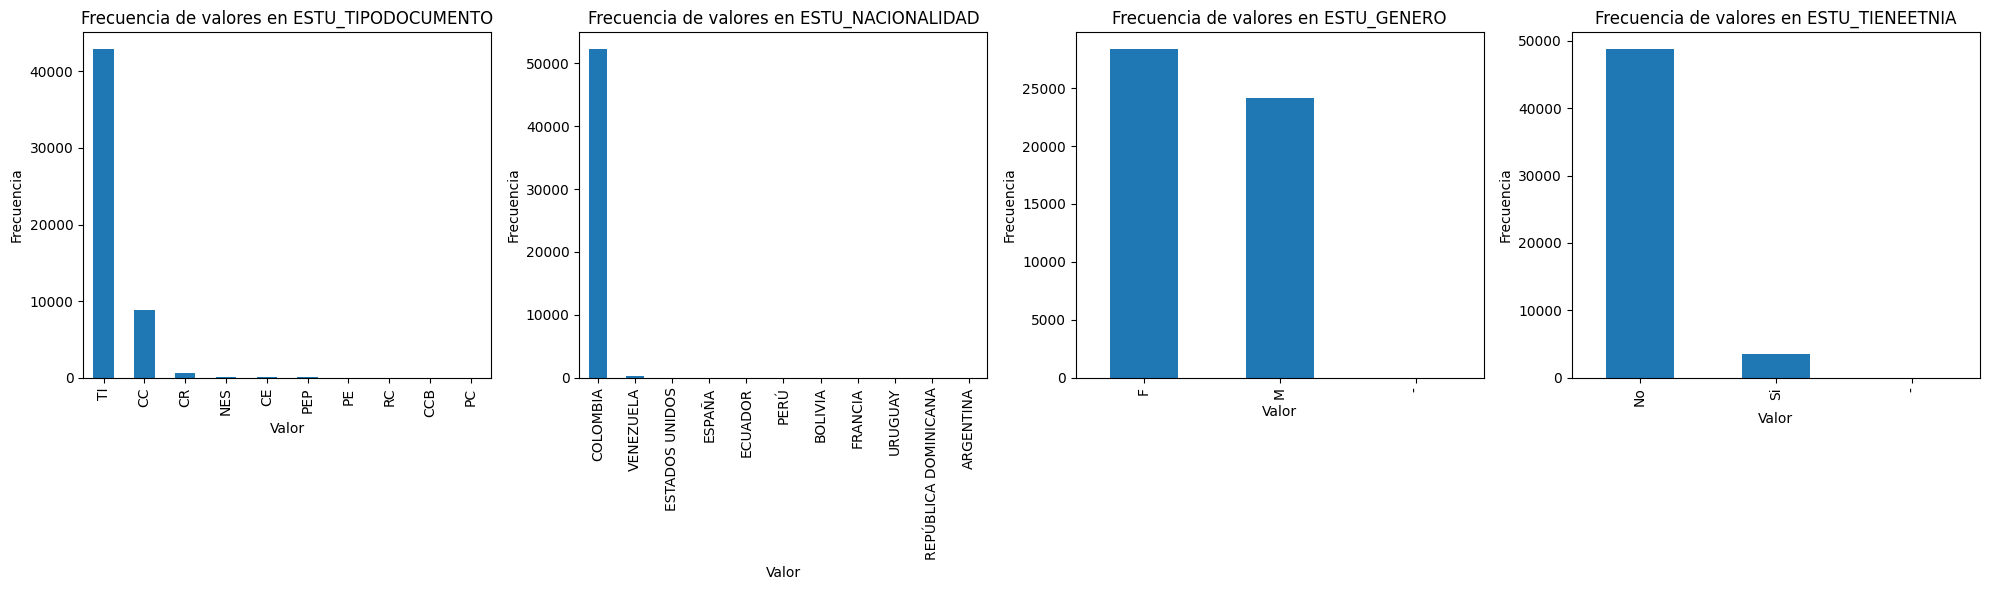

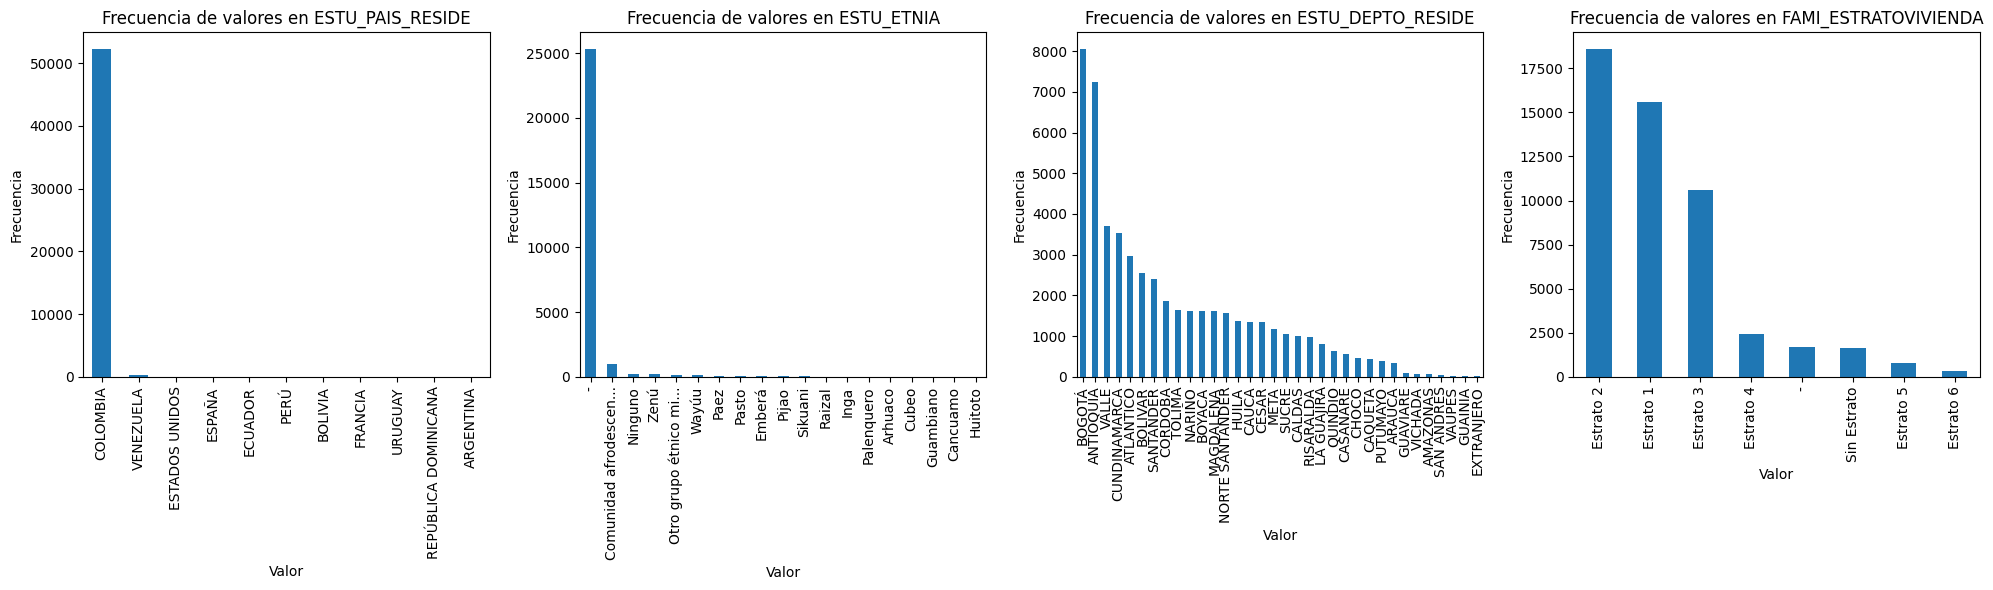

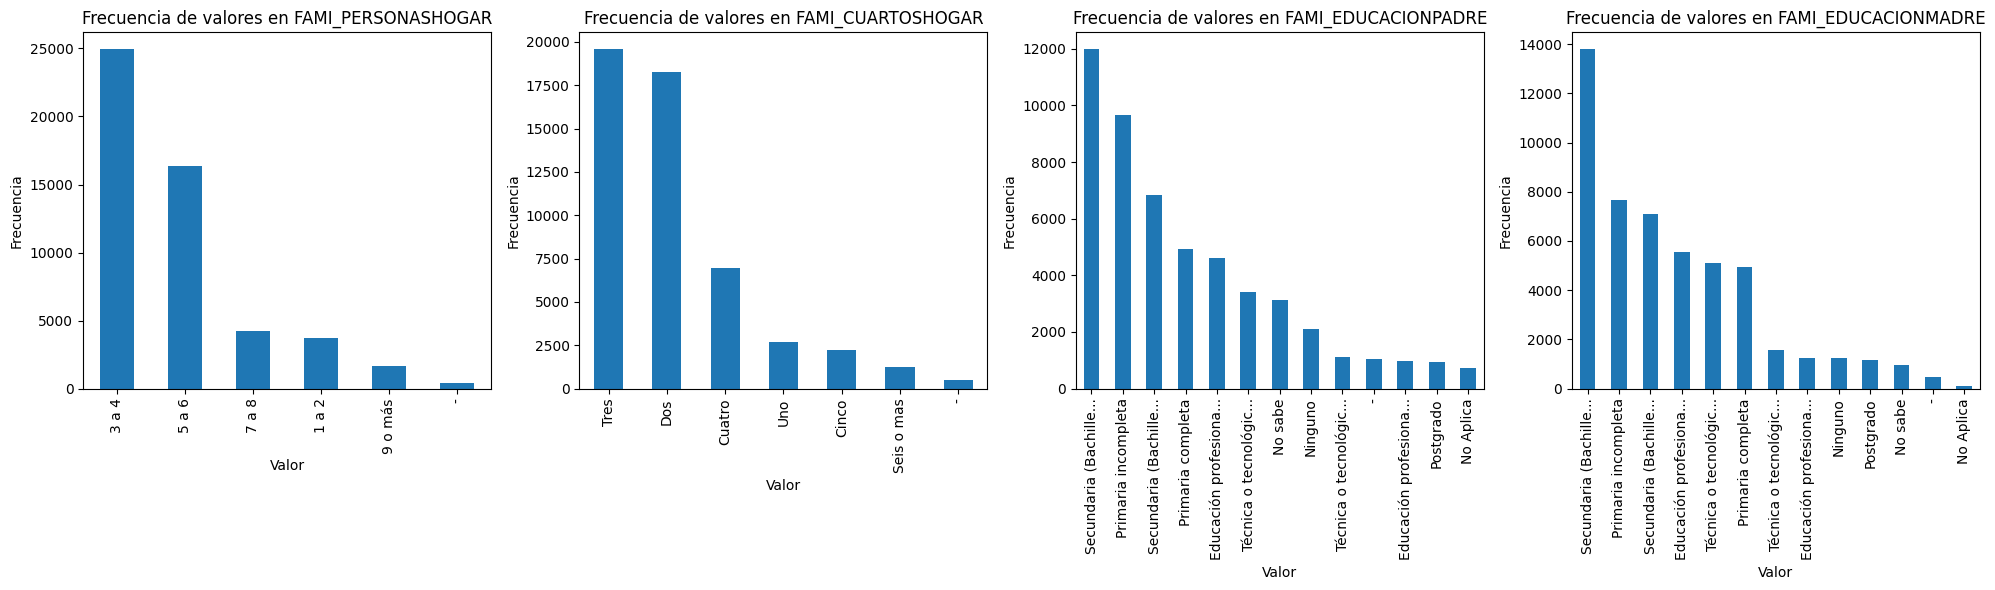

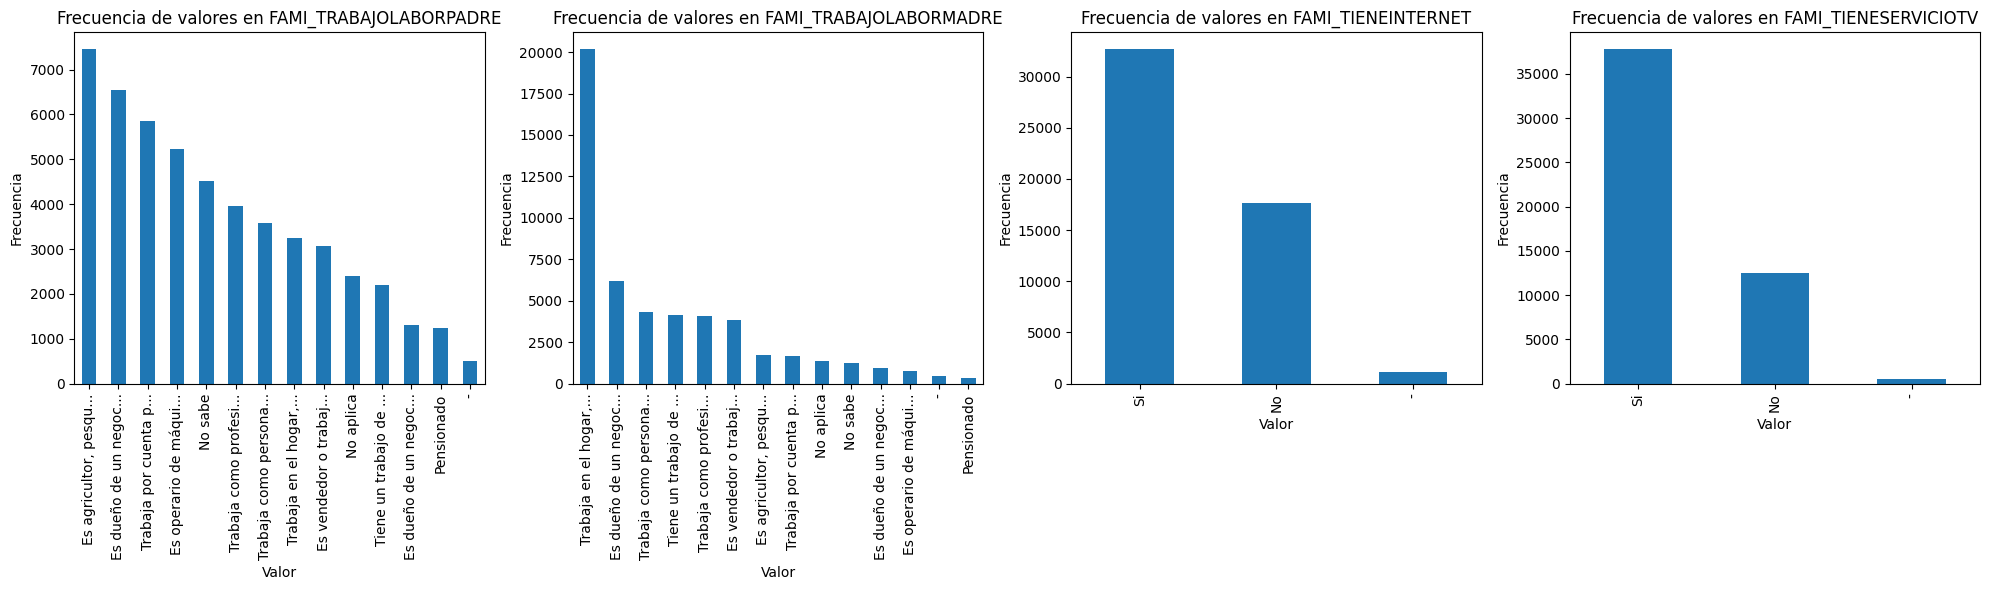

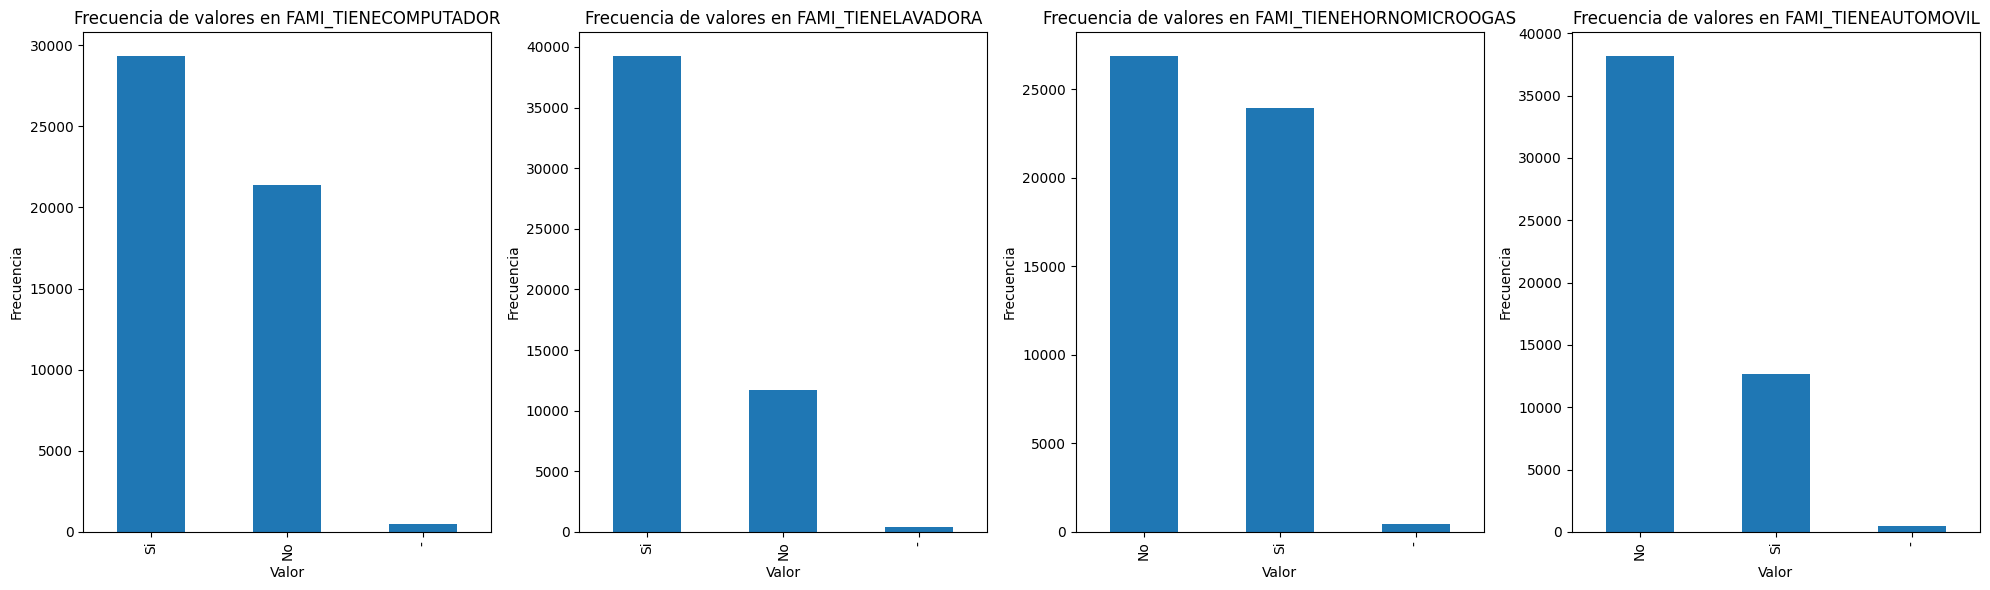

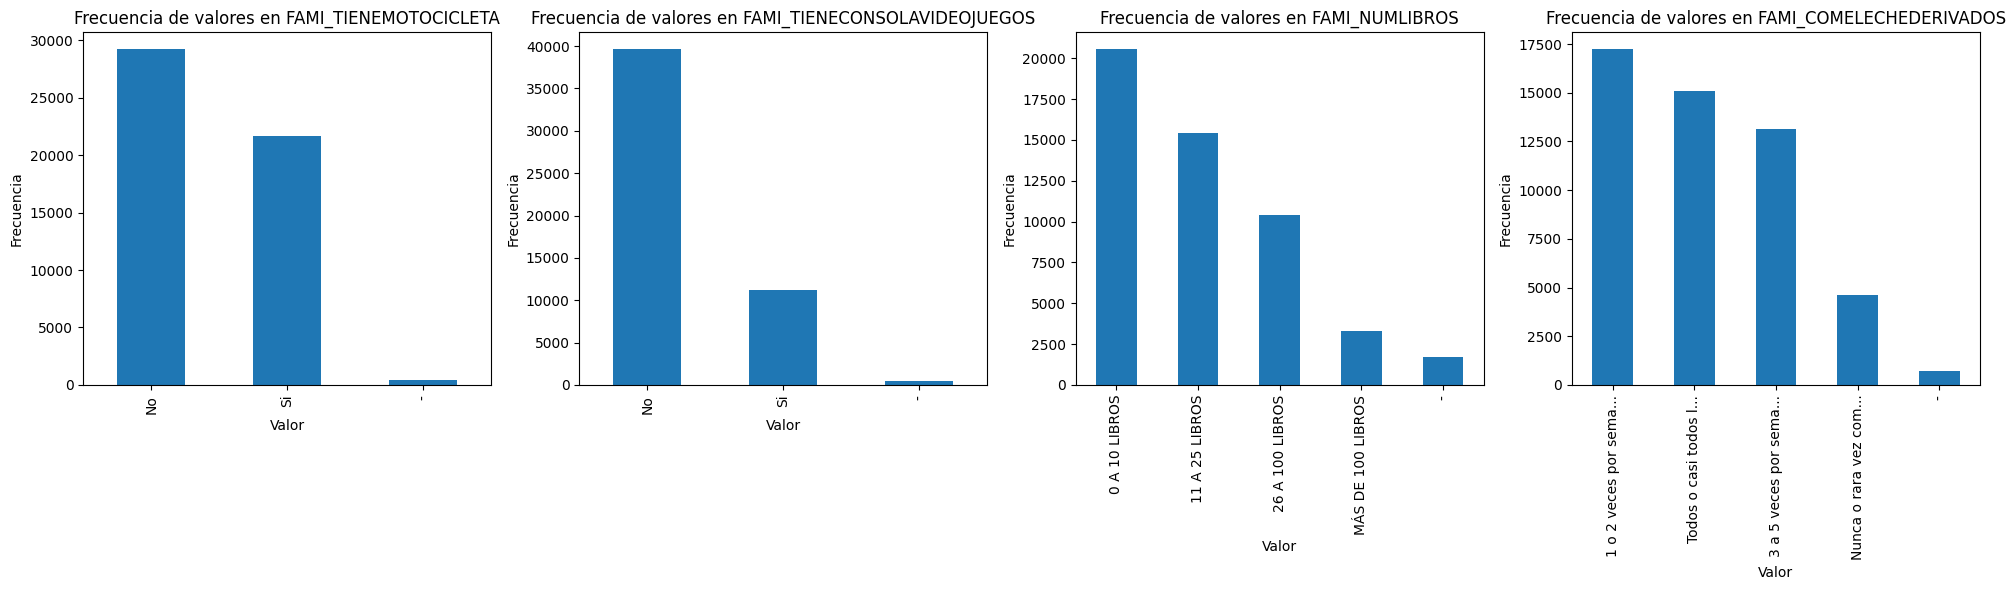

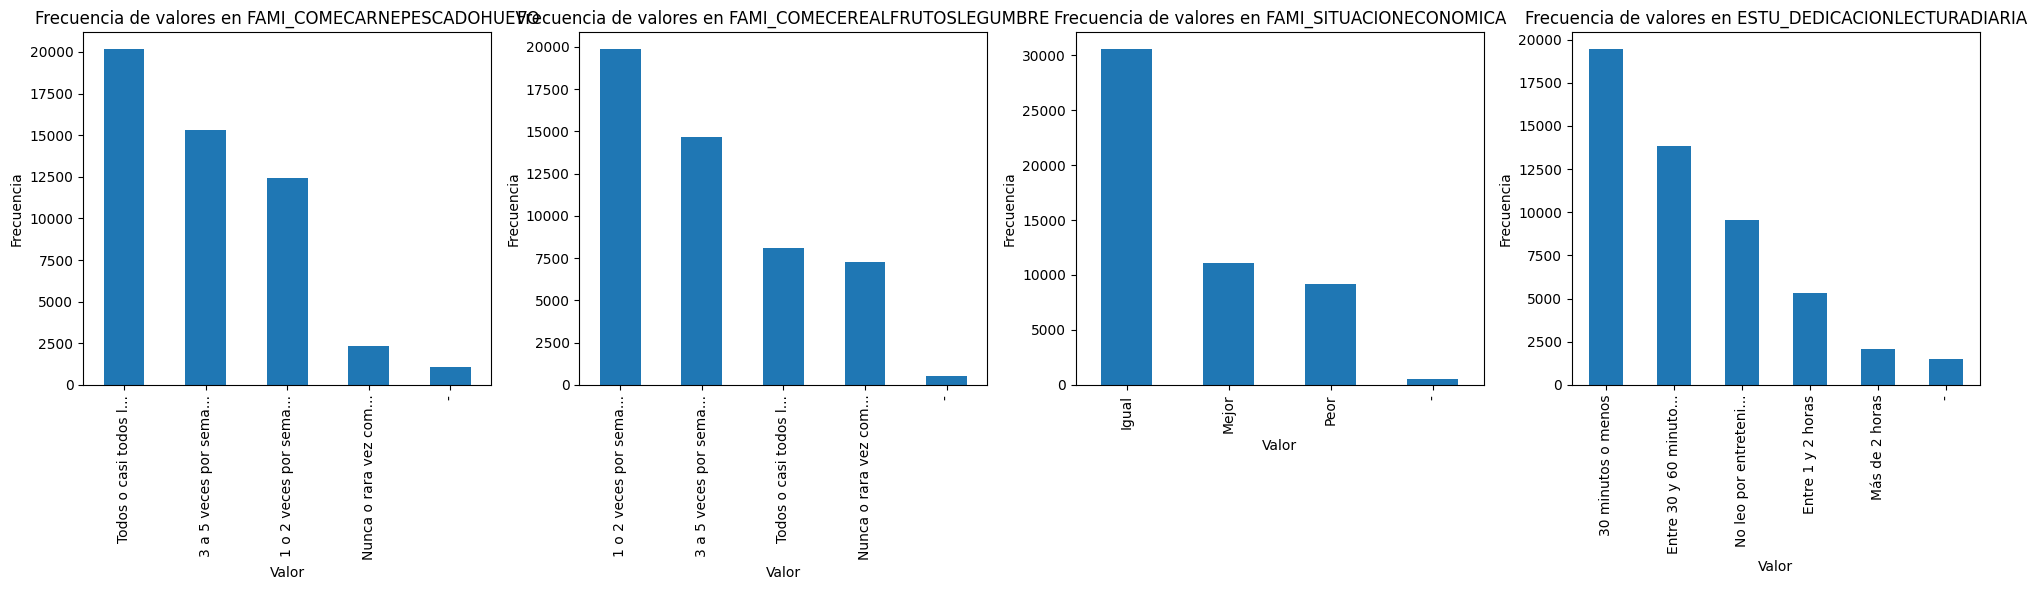

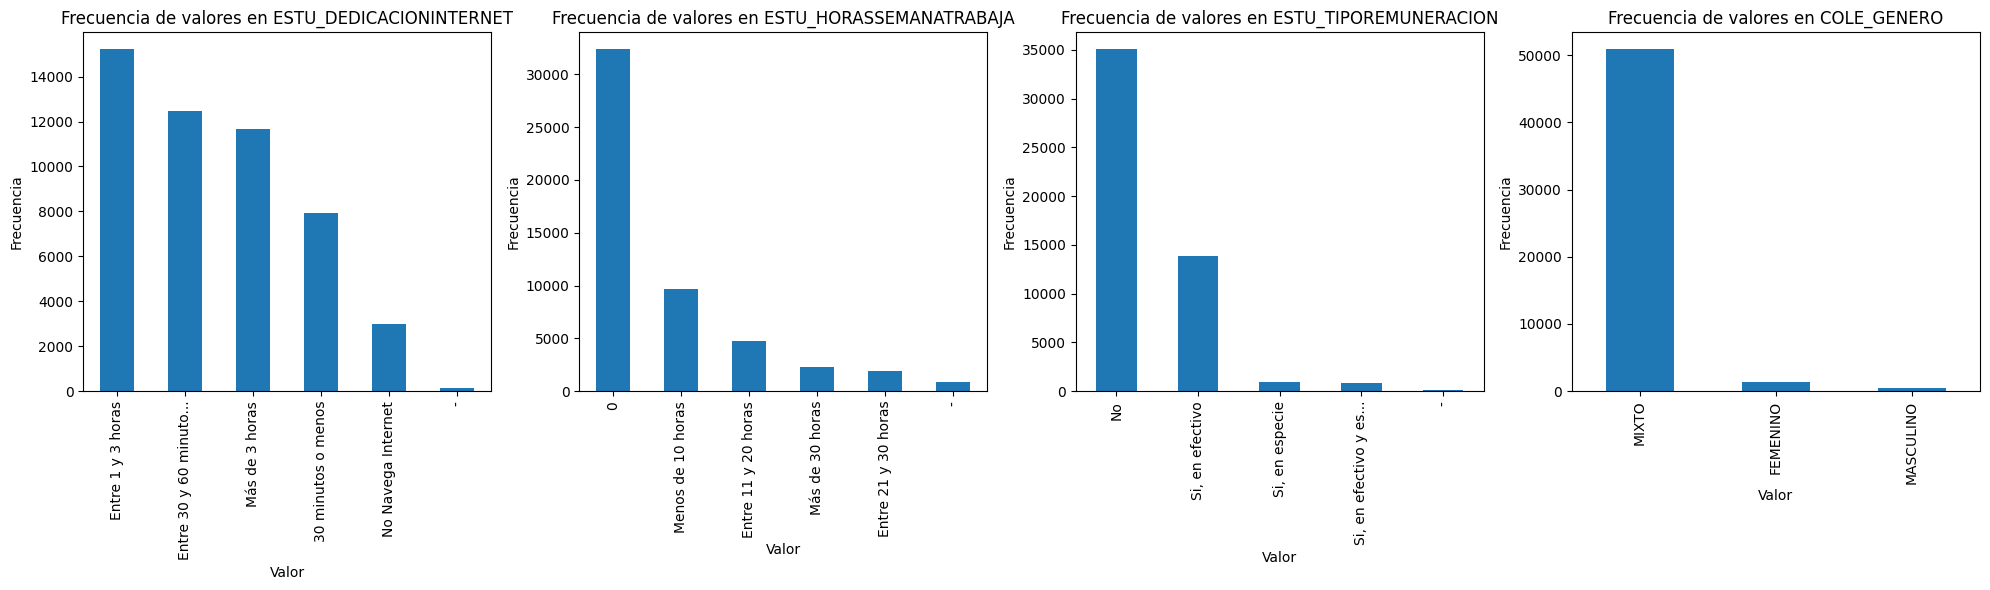

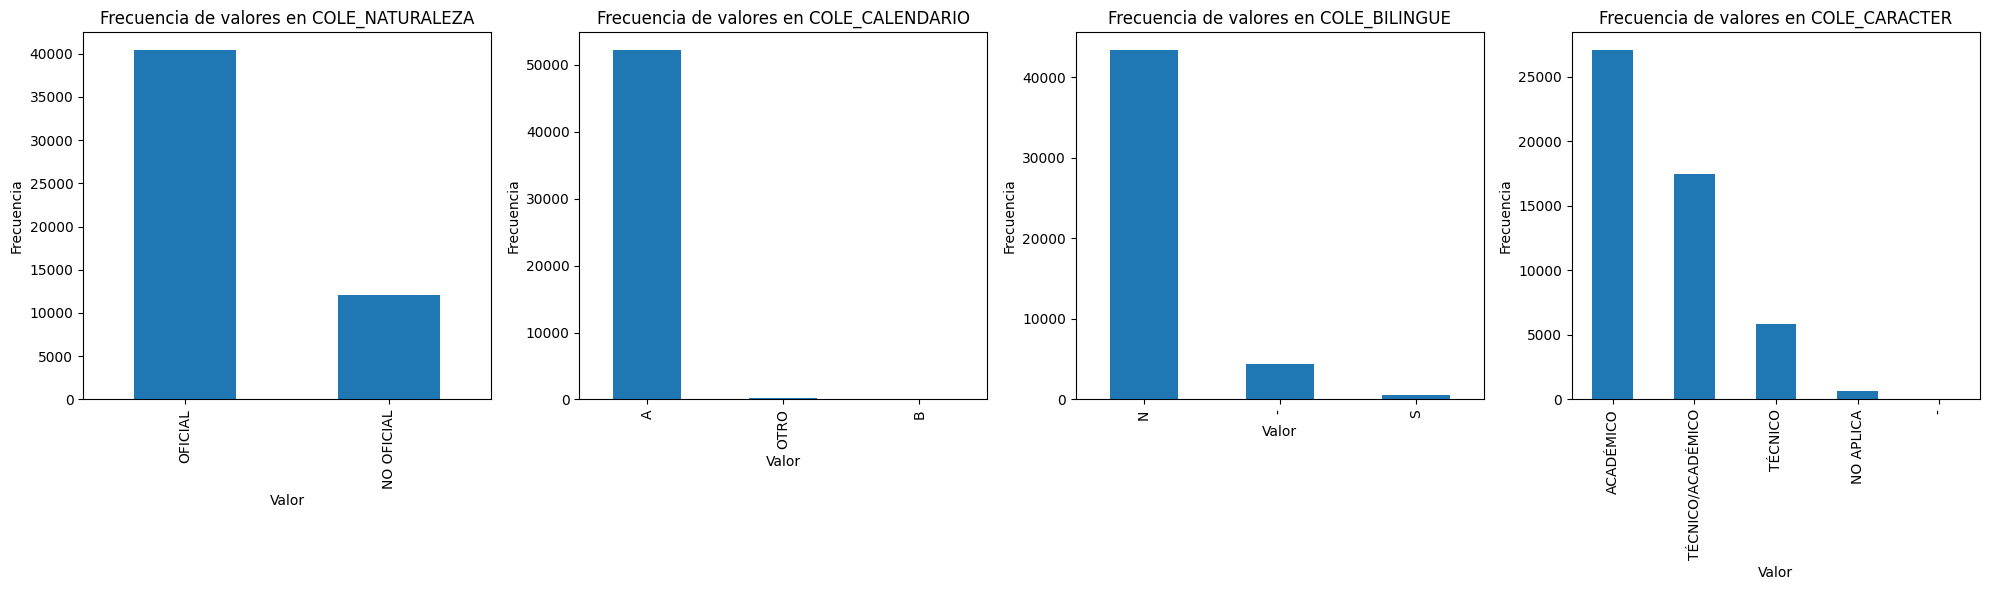

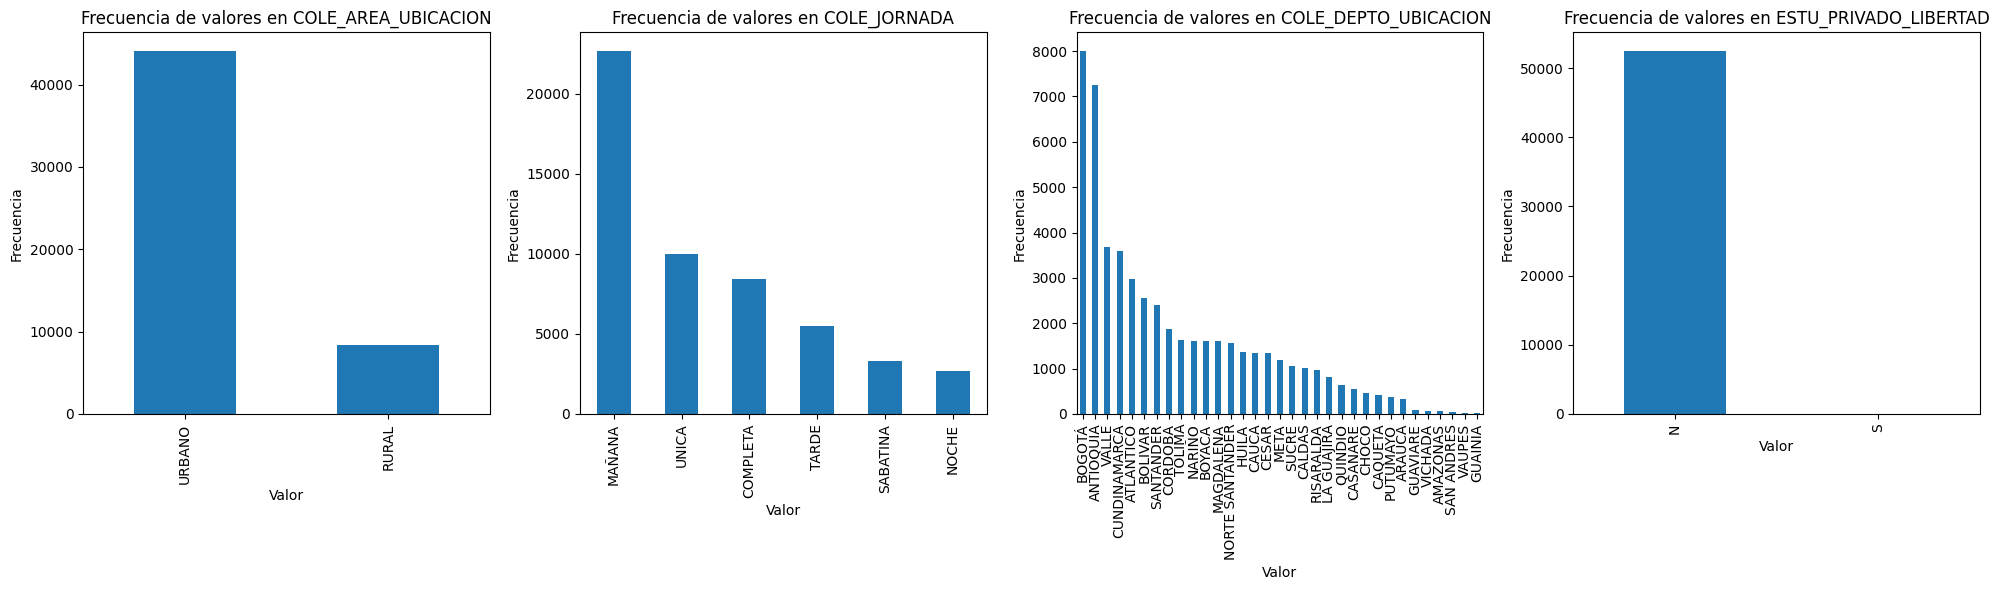

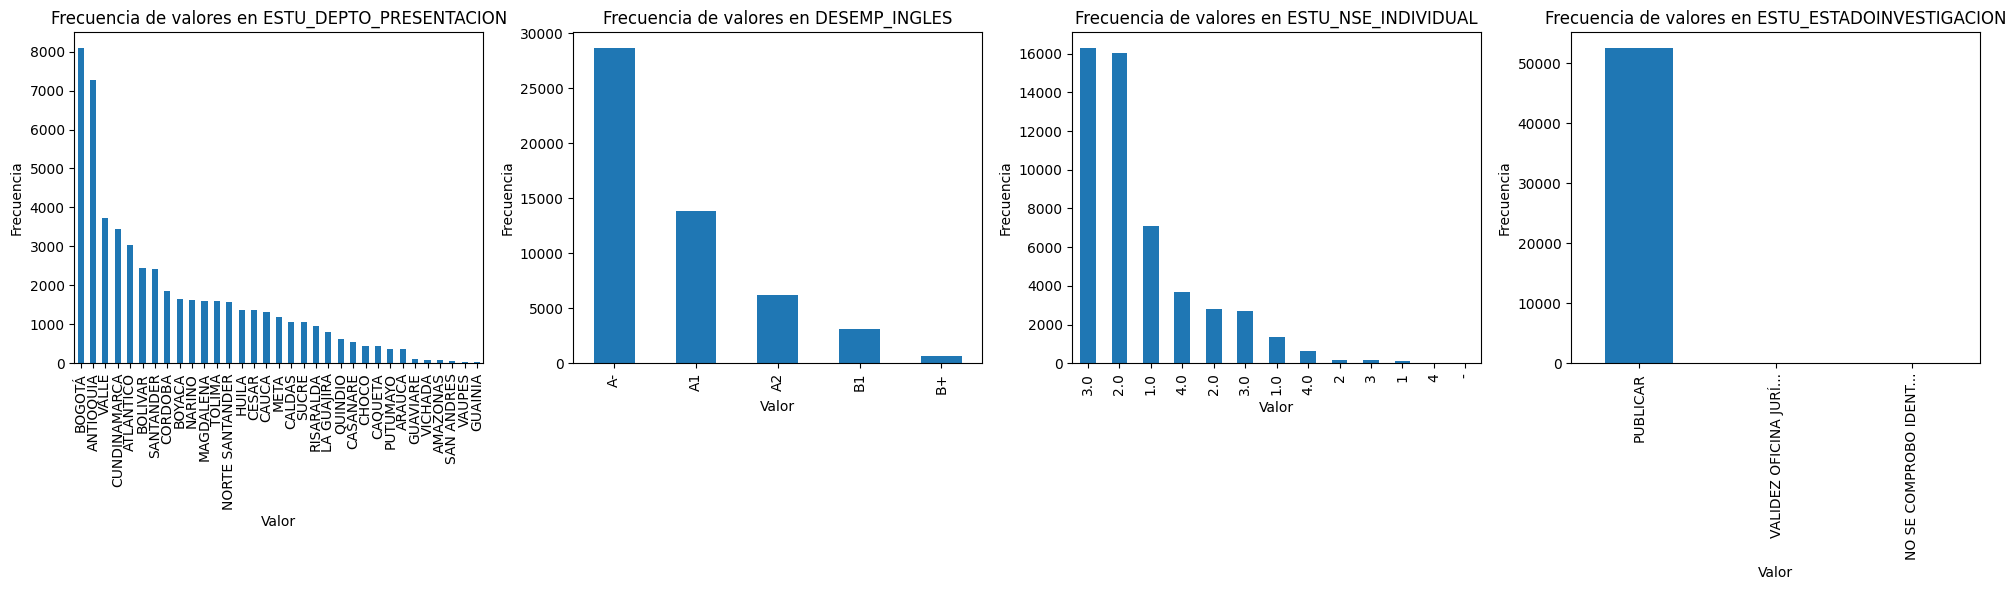

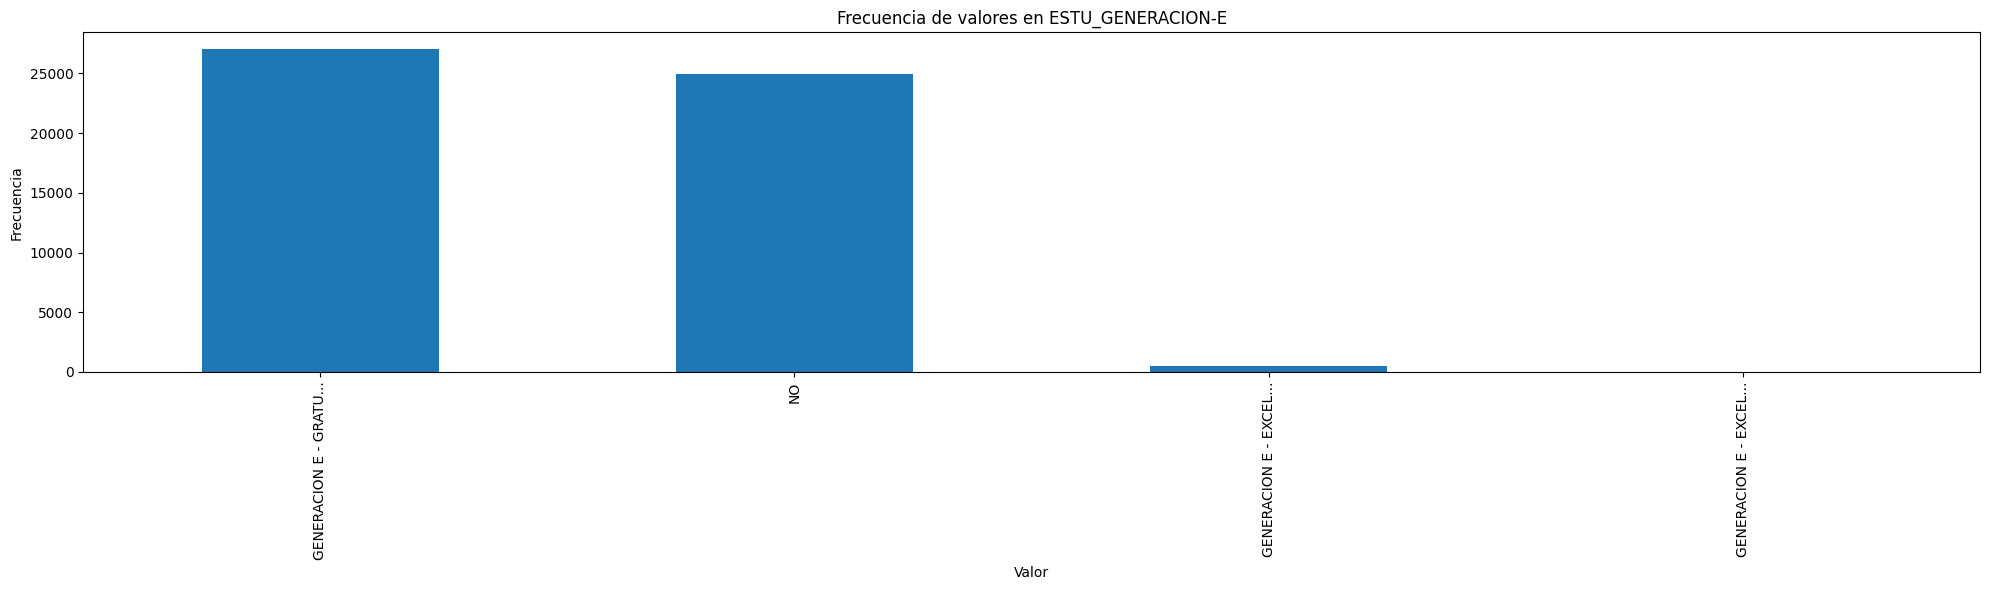

In [4]:
# Graficos de frecuencia variables categoricas
columnas_no_numericas = ['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 'ESTU_TIENEETNIA', 'ESTU_PAIS_RESIDE', 'ESTU_ETNIA','ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR','FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV','FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA','FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE','FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA','ESTU_TIPOREMUNERACION', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_GENERO', 'COLE_NATURALEZA', 'COLE_CALENDARIO', 'COLE_BILINGUE', 'COLE_CARACTER','COLE_NOMBRE_SEDE', 'COLE_SEDE_PRINCIPAL', 'COLE_AREA_UBICACION', 'COLE_JORNADA', 'COLE_MCPIO_UBICACION', 'COLE_DEPTO_UBICACION', 'ESTU_PRIVADO_LIBERTAD','ESTU_MCPIO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION', 'DESEMP_INGLES', 'ESTU_ESTADOINVESTIGACION', 'ESTU_GENERACION-E']
columnas_no_numericas_ajustado = ['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',  'ESTU_TIENEETNIA', 'ESTU_PAIS_RESIDE', 'ESTU_ETNIA', 'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE', 'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA', 'ESTU_TIPOREMUNERACION', 'COLE_GENERO', 'COLE_NATURALEZA', 'COLE_CALENDARIO', 'COLE_BILINGUE', 'COLE_CARACTER', 'COLE_AREA_UBICACION', 'COLE_JORNADA', 'COLE_DEPTO_UBICACION', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_DEPTO_PRESENTACION', 'DESEMP_INGLES', 'ESTU_NSE_INDIVIDUAL', 'ESTU_ESTADOINVESTIGACION', 'ESTU_GENERACION-E']

grupos_columnas = [columnas_no_numericas_ajustado[i:i+4] for i in range(0, len(columnas_no_numericas_ajustado), 4)]
for grupo in grupos_columnas:
    num_columnas_grupo = len(grupo)
    fig, axs = plt.subplots(1, num_columnas_grupo, figsize=(20, 6))
    if num_columnas_grupo == 1: 
        axs = [axs]  
    for i, columna in enumerate(grupo):
        frecuencia_valores = df[columna].value_counts()
        MAX_LENGTH = 20
        etiquetas_truncadas = [str(text)[:MAX_LENGTH] + '...' if len(str(text)) > MAX_LENGTH else text for text in frecuencia_valores.index]
        frecuencia_valores.index = etiquetas_truncadas
        frecuencia_valores.plot(kind='bar', ax=axs[i])
        axs[i].set_title(f'Frecuencia de valores en {columna}')
        axs[i].set_xlabel('Valor')
        axs[i].set_ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

Podemos identificar que la mayoria de estudiantes tienen Tarjeta de Identidad como documento de identificacion y tienen ciudadania Colombiana. Los generos estan relativamente iguales, con un numero mayo de hombres. La mayoria de los estudiantes no tienen etnia y residen en Colombia. 

Para las variables categoricas se cuentan con variables que incluyen otras variables como por ejemplo el municipio y el departamento teniendo presente que el departamento esta conformado por Minicipios. Algunas de estas variables son:


    'ESTU_MCPIO_RESIDE' considerando que tenemos 'ESTU_DEPTO_RESIDE' 
    'COLE_MCPIO_UBICACION'  considerando que tenemos 'COLE_DEPTO_UBICACION'
    'ESTU_MCPIO_PRESENTACION' considerando que tenemos ESTU_DEPTO_PRESENTACION'

Por otra lado tenemos variables categoricas y numericas que reflejan la misma informacion: 

    ESTU_MCPIO_RESIDE y	ESTU_COD_RESIDE_MCPIO
    ESTU_DEPTO_RESIDE y ESTU_COD_RESIDE_DEPTO
    COLE_COD_DANE_SEDE y COLE_NOMBRE_SEDE
    COLE_COD_MCPIO_UBICACION y COLE_MCPIO_UBICACION
    COLE_COD_DEPTO_UBICACION y COLE_DEPTO_UBICACION
    ESTU_COD_MCPIO_PRESENTACION y ESTU_MCPIO_PRESENTACION
    ESTU_DEPTO_PRESENTACION y ESTU_COD_DEPTO_PRESENTACION

VARIABLES DE INTERES:

Inicialmente podemos identificar variables que podrian tener relevancia para predecir la variable PUNT_GLOBAL. 

De las variables numericas podemos identificar las variables ESTU_INSE_INDIVIDUAL (Indicador de nivel socioeconomico) y ESTU_NSE_INDIVIDUAL (Nivel socioeconomico individual) que reflejan un clasificacion socieconomica de cada estudiante. Tambien podria reslatarse la variable ESTU_NSE_ESTABLECIMIENTO que es el nivel socioeconomico del establecimiento.

De las variables categoricas de interes podemos identificar el municipio y departamento de residencia del estudiante. El genero puede ser otra variable interesante para analizar. Otras variables de interes que reflejan las condiciones socieconomicas del estudiante. Otro analisis que podria servir seria ver el desemepño de los estudiantes de acuerdo a si tienen o no etnia.
A nivel socieconomico podria validarse la variable que clasifica el estrato de la vivienda del estudiante. La cantidad de horas que el estudiante dedica a leer tambien es una variable que puede ser interesante para el analisis.
Las caracteristicas del colegio tambien podrian incidir en los resultados del examen por lo que es bueno analizar si el colegio es bilingue, el calendario, la naturaleza y la ubicacion del mismo (Tanto si es rural o no) como el departamento/municipio.




In [5]:
#Analisis valores faltantes variables de interes
variables_ineteres_numericas = ["ESTU_INSE_INDIVIDUAL", "ESTU_NSE_INDIVIDUAL", "ESTU_NSE_ESTABLECIMIENTO", "PUNT_GLOBAL"]
variables_ineteres_categoricas = ['ESTU_GENERO', 'ESTU_TIENEETNIA', 'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_NUMLIBROS', 'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET' , 'COLE_GENERO', 'COLE_NATURALEZA', 'COLE_CALENDARIO', 'COLE_BILINGUE', 'COLE_AREA_UBICACION' ,'COLE_MCPIO_UBICACION', 'COLE_DEPTO_UBICACION']
#Remplazar simbolo "-" por NaN
df = df.replace(r'^\s*-\s*$', np.nan, regex=True)
# Identificacion de porcentaje de datos faltantes por columna en el dataframe entero
valores_nulos = df[variables_ineteres_numericas].isna().sum().sort_values(ascending = False)/df.shape[0]
print("El porcentaje de datos faltantes para las variables de interes numericas son: ")
print(valores_nulos)
valores_nulos = df[variables_ineteres_categoricas].isna().sum().sort_values(ascending = False)/df.shape[0]
print("El porcentaje de datos faltantes para las variables de interes categoricas son: ")
print(valores_nulos)
print("El porcentaje de datos faltantes para las la columna estu_etnia son: ")
valores_nulos = df["ESTU_ETNIA"].isna().sum()/df.shape[0]
print(valores_nulos)

El porcentaje de datos faltantes para las variables de interes numericas son: 
ESTU_INSE_INDIVIDUAL        0.029360
ESTU_NSE_INDIVIDUAL         0.029360
ESTU_NSE_ESTABLECIMIENTO    0.000133
PUNT_GLOBAL                 0.000000
dtype: float64
El porcentaje de datos faltantes para las variables de interes categoricas son: 
COLE_BILINGUE                   0.164193
FAMI_NUMLIBROS                  0.053964
FAMI_ESTRATOVIVIENDA            0.048160
ESTU_DEDICACIONINTERNET         0.043555
ESTU_DEDICACIONLECTURADIARIA    0.042775
FAMI_SITUACIONECONOMICA         0.032614
ESTU_TIENEETNIA                 0.003406
ESTU_DEPTO_RESIDE               0.000285
ESTU_MCPIO_RESIDE               0.000285
ESTU_GENERO                     0.000114
COLE_GENERO                     0.000000
COLE_NATURALEZA                 0.000000
COLE_CALENDARIO                 0.000000
COLE_AREA_UBICACION             0.000000
COLE_MCPIO_UBICACION            0.000000
COLE_DEPTO_UBICACION            0.000000
dtype: float64
El por

La columna "estu_etnia" no esta en el dataframe del 2020. Adicionalmente podemos identificar que el total de datos faltantes de la columna "estu_etnia" es un 96% de los datos. Por lo que no es pertinente llega a eliminar datos basado en los datos faltantes de esta columna ya que seria la mayoria del dataset.
Podemos adicionalemnete evidenciar que la columna que mas datos faltantes tiene (despues de "estu_etnia") es "cole_bilingue " y solo se tiene menos de 1.7% de datos faltantes.

In [6]:
# Porcentaje de filas para las variables de interes  que tengan 2 o mas datos faltantes
lista_columnas_interes = variables_ineteres_numericas + variables_ineteres_categoricas
num_nulos_por_fila = ((df[lista_columnas_interes].isnull().sum(axis=1) >= 2).sum()/df.shape[0])*100
print("El porcentaje de filas para las variables de interes con 2 o mas valores faltantes es : " + str(num_nulos_por_fila))


El porcentaje de filas para las variables de interes con 2 o mas valores faltantes es : 5.596148723218023


Se tiene un total de 5.5% de filas con dos o mas datos faltantes para las columnas de interes que se van a considerar. Dado que el porcentaje de datos flatantes relativamente no es grande, se va a eliminar las filas que tengas mas de dos datos faltantes y finalmente para las filas que queden, se van a remplazar los valores faltantes con la moda de la columna correspondiente.

In [7]:
#Tratamiento de datos faltantes eliminando filas con mas de dos valores faltantes y remplazando con la moda los valores faltantes que queden
df_columnas_interes = df[lista_columnas_interes].copy()
df_columnas_interes = df_columnas_interes[df_columnas_interes.isna().sum(axis=1) <=2]

for columna in df_columnas_interes.columns:
    moda = df_columnas_interes[columna].mode()[0]  
    df_columnas_interes[columna] = df_columnas_interes[columna].fillna(moda)
df_columnas_interes.shape


(50033, 20)

In [8]:
#Validacion valores nulos resultantes.
valores_nulos = df_columnas_interes.isna().sum()/df.shape[0]
valores_nulos

ESTU_INSE_INDIVIDUAL            0.0
ESTU_NSE_INDIVIDUAL             0.0
ESTU_NSE_ESTABLECIMIENTO        0.0
PUNT_GLOBAL                     0.0
ESTU_GENERO                     0.0
ESTU_TIENEETNIA                 0.0
ESTU_DEPTO_RESIDE               0.0
ESTU_MCPIO_RESIDE               0.0
FAMI_ESTRATOVIVIENDA            0.0
FAMI_NUMLIBROS                  0.0
FAMI_SITUACIONECONOMICA         0.0
ESTU_DEDICACIONLECTURADIARIA    0.0
ESTU_DEDICACIONINTERNET         0.0
COLE_GENERO                     0.0
COLE_NATURALEZA                 0.0
COLE_CALENDARIO                 0.0
COLE_BILINGUE                   0.0
COLE_AREA_UBICACION             0.0
COLE_MCPIO_UBICACION            0.0
COLE_DEPTO_UBICACION            0.0
dtype: float64

Finalmente quedamos con un Dataframe sin valores faltantes y 19 columnas de interes para analizar con mas detalle.

## Fase 2: identificar características y relaciones en las variables

En esta fase realizarás análisis descriptivo para identificar posibles patrones o relaciones entre las variables de interés para la problemática planteada. Además, expondrás estadísticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegirás el segmento de los datos sobre el cual profundizarás con tu análisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable sociodemográfica relevante en el contexto del problema.
* Utilizar librerías especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de interés. Los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser útiles.
* Utilizar el método `groupby` de `pandas`, en conjunto con métodos de visualización, puede proveer evidencia del impacto de las variables sociodemográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:

* ¿Hay patrones de interés en las distribuciones de las variables o en las relaciones entre ellas?
* ¿Consideras que existe algún impacto significativo de variables sociodemográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables harías un análisis más profundo?

Para el analisis de las variables vamos a utilizar el DataFrame original sin el tratamiento de datos (eliminacion de datos faltantes y remplazo de datos faltantes) para ver como es el comportamiento de las variables de forma general.

Estadisticas PUNT_GLOBAL
count    52554.000000
mean       247.602904
std         50.199104
min          0.000000
25%        209.000000
50%        244.000000
75%        283.000000
max        491.000000
Name: PUNT_GLOBAL, dtype: float64


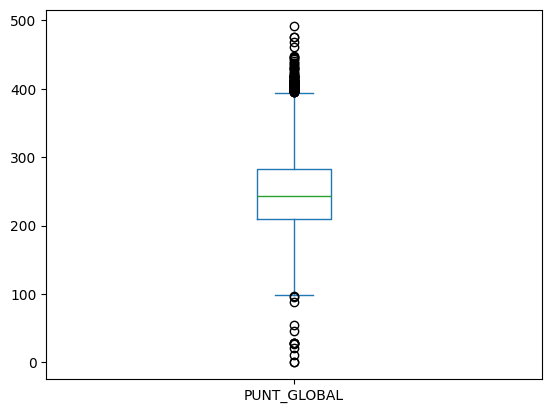

In [9]:
# Analisis variable PUNTAJE GLOBAL
df["PUNT_GLOBAL"].plot(kind='box')
print("Estadisticas PUNT_GLOBAL")
print(df["PUNT_GLOBAL"].describe())

Podemos evidenciar que la variable PUNTAJE_GLOBAL tiene un promedio de 247.6 con un desviacion estandar de 50.1. El 75% de los datos esta por debajo de 283.

Estadisticas PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
       PUNT_LECTURA_CRITICA  PUNT_MATEMATICAS  PUNT_C_NATURALES  \
count          52554.000000      52554.000000      52554.000000   
mean              52.247916         50.900160         48.291567   
std               10.354790         11.866465         10.668589   
min                0.000000          0.000000          0.000000   
25%               45.000000         42.000000         40.000000   
50%               52.000000         51.000000         48.000000   
75%               60.000000         59.000000         56.000000   
max              100.000000        100.000000        100.000000   

       PUNT_SOCIALES_CIUDADANAS   PUNT_INGLES  
count              52554.000000  52537.000000  
mean                  47.246375     47.710547  
std                   12.111179     12.027014  
min                    0.000000      0.000000  
25%                   38.000000     39.000000  
50%

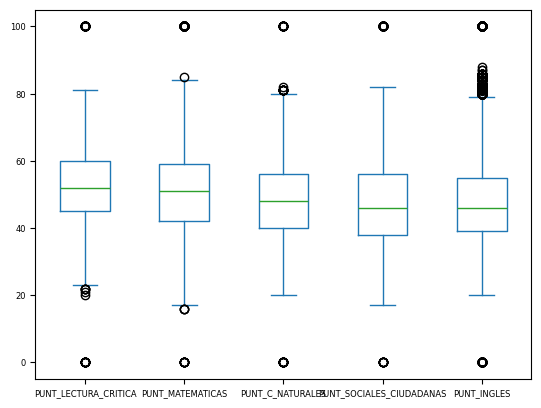

In [10]:
# Puntaje por area de evaluacion examen
puntajes = ["PUNT_LECTURA_CRITICA",	"PUNT_MATEMATICAS", "PUNT_C_NATURALES",	"PUNT_SOCIALES_CIUDADANAS",	"PUNT_INGLES"]
df[puntajes].plot(kind='box', fontsize=6)
print("Estadisticas PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES")
print(df[puntajes].describe())

______________ESTU_GENERO______________


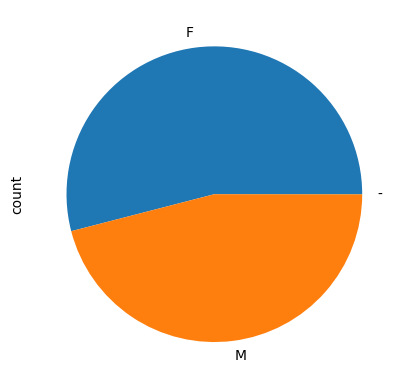

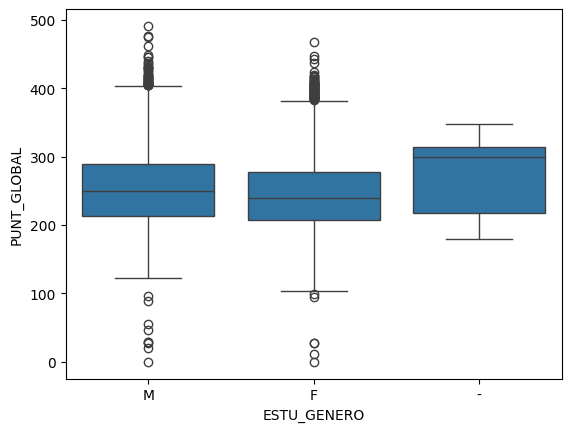

______________ESTU_TIENEETNIA______________


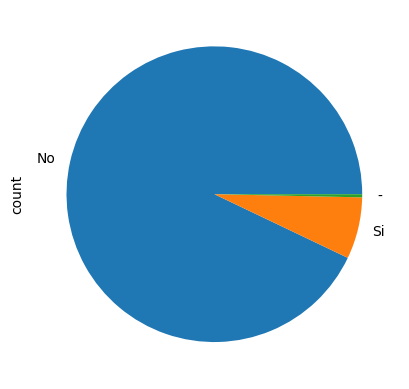

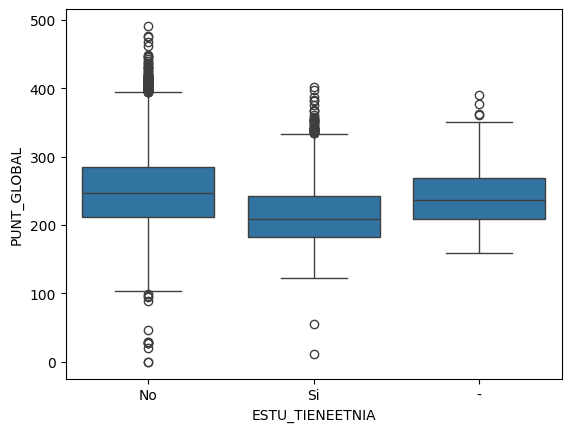

______________ESTU_DEPTO_RESIDE______________


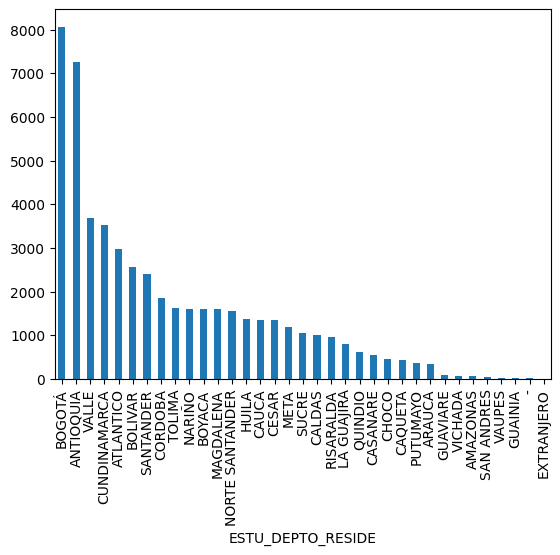

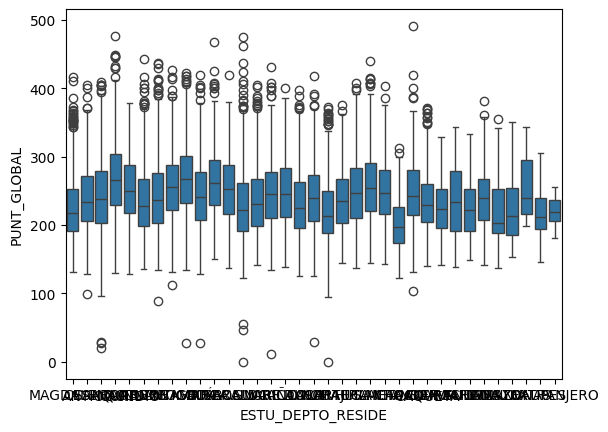

______________FAMI_ESTRATOVIVIENDA______________


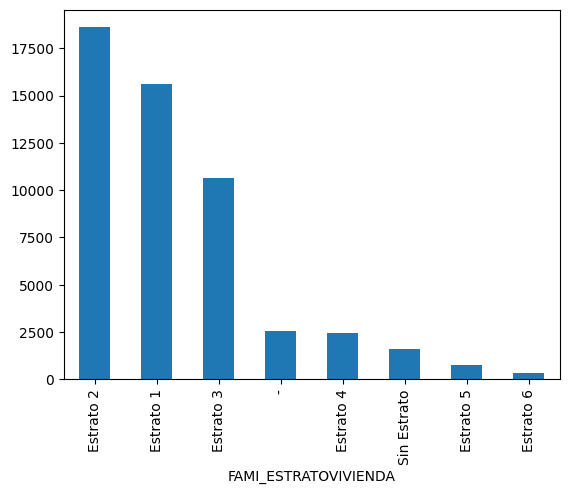

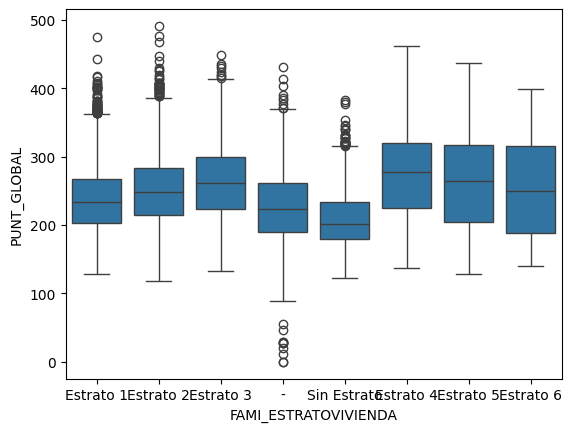

______________FAMI_TIENEINTERNET______________


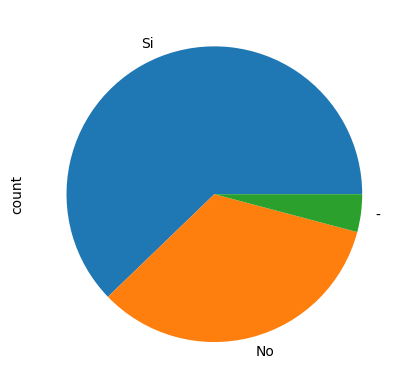

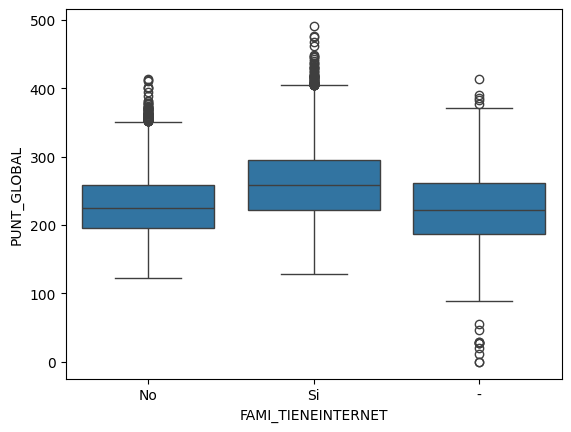

______________FAMI_TIENECOMPUTADOR______________


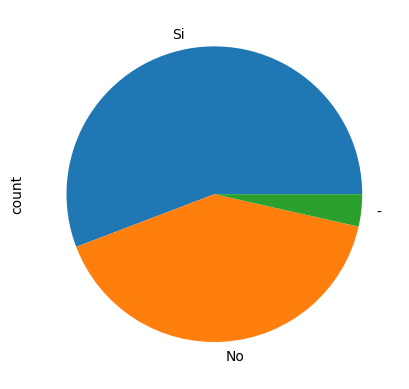

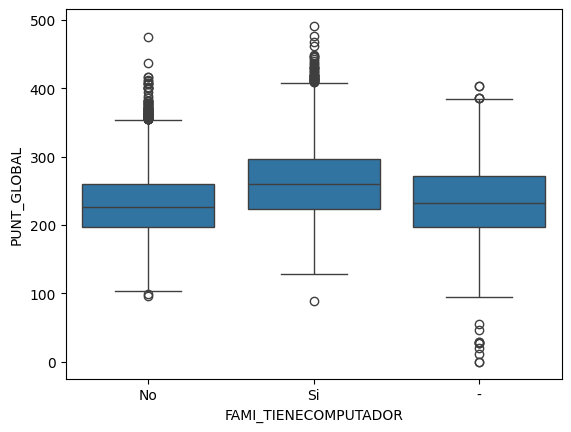

______________FAMI_COMECEREALFRUTOSLEGUMBRE______________


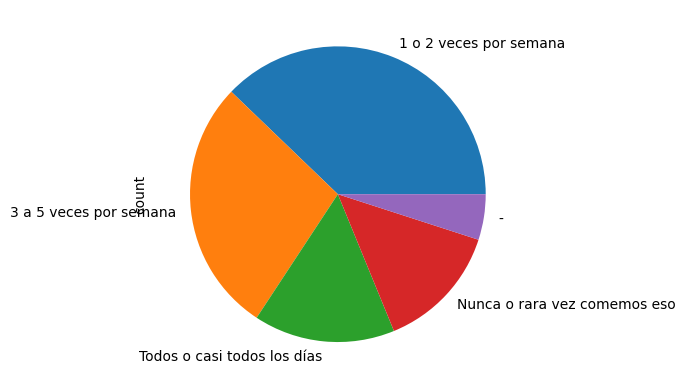

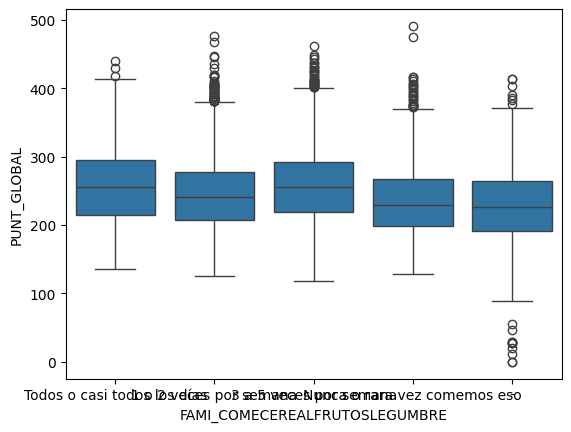

______________ESTU_DEDICACIONLECTURADIARIA______________


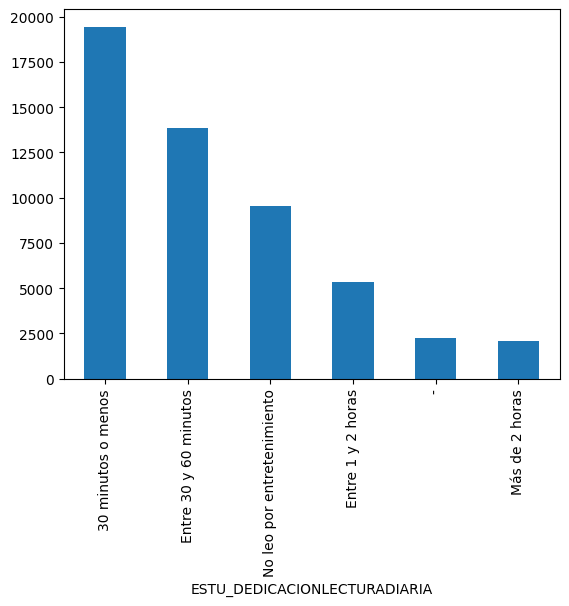

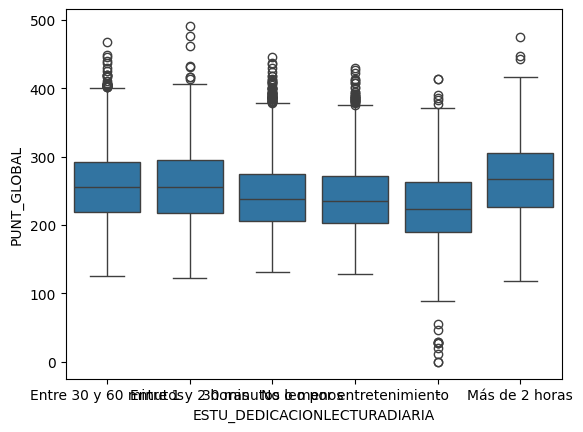

______________COLE_GENERO______________


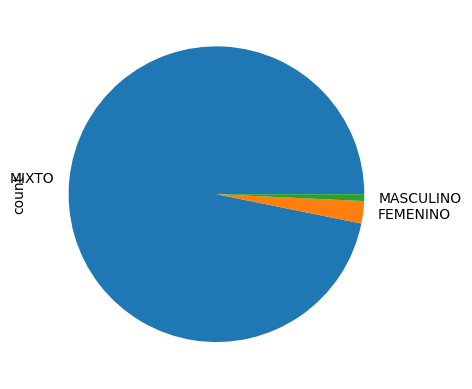

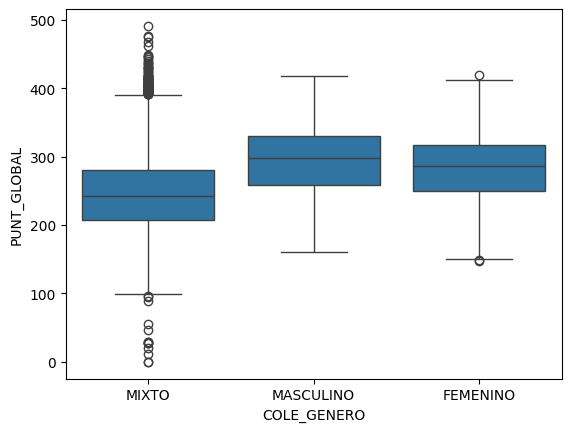

______________COLE_BILINGUE______________


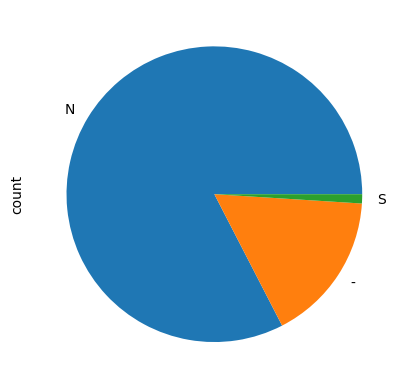

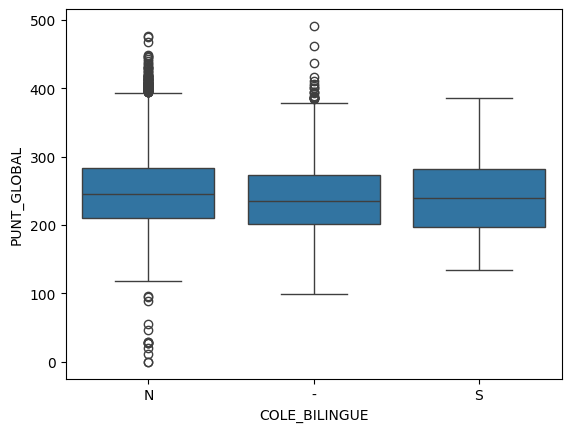

______________COLE_AREA_UBICACION______________


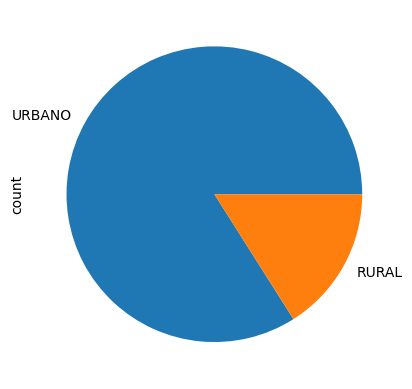

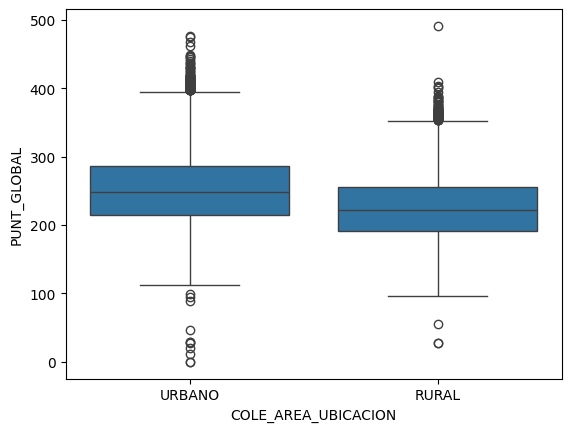

______________ESTU_NSE_INDIVIDUAL______________


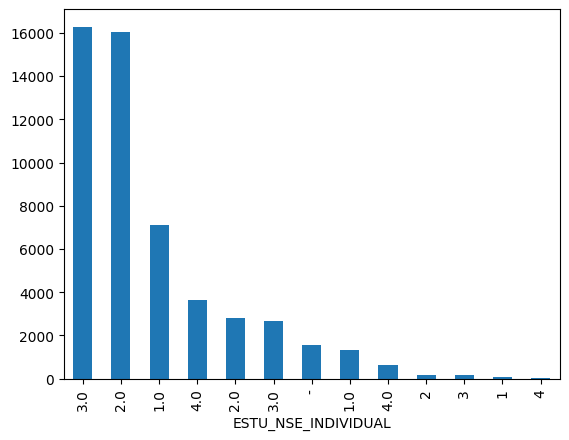

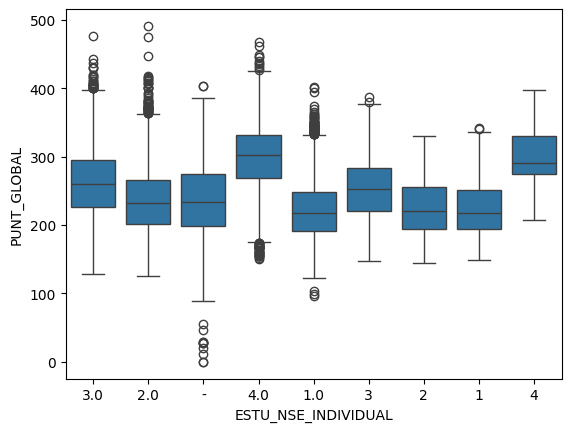

______________FAMI_SITUACIONECONOMICA______________


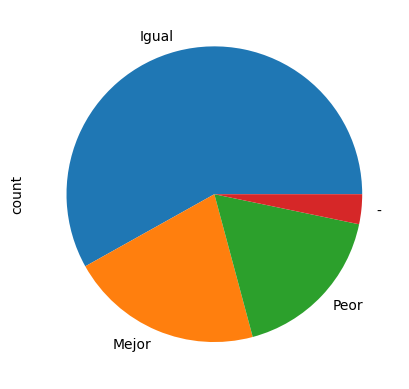

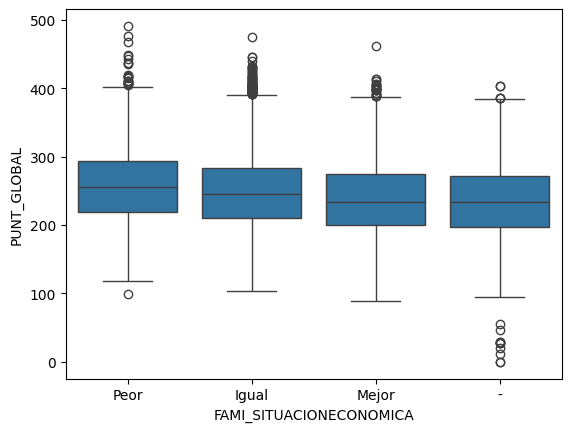

In [11]:
# Analisis variables demograficas y validacion contra puntaje_global
df_graficas = df.fillna('-')
var_demogrficas = ['ESTU_GENERO', 'ESTU_TIENEETNIA', 'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_COMECEREALFRUTOSLEGUMBRE', 'ESTU_DEDICACIONLECTURADIARIA', 'COLE_GENERO', 'COLE_BILINGUE', 'COLE_AREA_UBICACION', 'ESTU_NSE_INDIVIDUAL', 'FAMI_SITUACIONECONOMICA']
for variable in var_demogrficas:
    print(f"______________{variable}______________")
    if variable != "ESTU_INSE_INDIVIDUAL":
        if len(df_graficas[variable].unique()) < 6:
            df_graficas[variable].value_counts().plot(kind='pie')
        else:
            df_graficas[variable].value_counts().plot(kind='bar')
        plt.show()
        sns.boxplot(x=variable, y='PUNT_GLOBAL', data=df_graficas)
    else:
        df_graficas['ESTU_INSE_INDIVIDUAL'] = df_graficas['ESTU_INSE_INDIVIDUAL'].replace('-', 0)
        df_graficas.plot(x=variable, y="PUNT_GLOBAL", kind='scatter')
    plt.show()


Podemos ver las siguientes caracteristicas de las variables en relacion a la variable de PUNTAJE_GLOBAL:

1. Para la variable ESTU_GENERO podemos ver que los estudiantes que no definen un genero  tienen un mejor desempeño en los resultados del examen. 
2. Para la variable ESTU_TIENETNIA se puede observar que los estudiantes que indicaron no tener etnia tienen en promedio un mejor puntaje en relación a los que dijeron que si o que no respondieron.
3. Para la variable ESTU_DPTO_RESIDENCIA podemos evidenciar que hay departamentos que tienen un mejor desempeño que otros en relación al resultado de las pruebas.
4. Para la variable FAMI_ESTRATOVIVIENDA podemos evidenciar que los estratos 4 y 5 en promedio tienen mejores resultados que los otros estratos. Los estratos mas bajos, 1, 2 y 3 tiene un promedio mas bajo. Tenemos también grupo de personas que no respondieron el estrato o que indicaron sin estrato.  
5. Para la variable FAMI_TIENEINTERNET podemos evidenciar que para los estudiantes de  familias que tienen Internet en promedio obtienen mejor resultado que para las que no tienen o los que no respondieron.
6. Para la variable FAMI_TIENECOMPUTADOR podemos evidenciar que para los estudiantes de  familias que tienen computador en promedio obtienen mejor resultado que para las que no tienen o los que no respondieron.
7. Para la variable ESTU_DEDICACIONLECTURADIARIA podemos evidenciar que aquellos estudiantes que tienen una dedicación diaria mayor a 2 horas tienen en promedio mejor resultados en el examen.
8. Para la variable COLE_GENERO podemos evidenciar que si el colegio es mixto el desempeño de los estudiantes del examen no es tan bueno en promedio comparado a los colegios de genero Femenino o Masculino.
9. Para la variable de COLE_BILINGUE podemos evidenciar que no hay in impacti directo en el resultado general de la prueba.
10. Para la variable COLE_AREA_UBICACION podemos evidenciar que para los colegios Urbanos  sus estudiantes en promedio obtienen mejores resultados en la prueba.
11. Para la variable ESTU_NSE_INDIVIDUAL podemos evidenciar que los estudiantes con NSE de 4 tienden en promedio a tener mejores resultados en la prueba.




In [12]:
# Estadisticas descriptivas variables numericas
columnas_numericas = ['PUNT_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA','PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS', 'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES','PUNT_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PERCENTIL_INGLES', 'PUNT_GLOBAL', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL']
print("Descripcion variables numericas")
df[columnas_numericas].describe()

Descripcion variables numericas


,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL
count,52554.000000,52554.000000,52554.000000,52554.000000,52554.000000,52554.000000,52554.000000,52554.000000,52554.000000,52554.000000,52554.000000,52554.000000,52537.000000,52554.000000,52554.000000
mean,52.247916,50.399018,2.619839,50.900160,50.389238,2.458386,48.291567,50.371389,2.021159,47.246375,50.361419,1.961297,47.710547,50.126365,247.602904
std,10.354790,28.954674,0.742282,11.866465,28.989639,0.737443,10.668589,28.951169,0.759673,12.111179,28.941773,0.825304,12.027014,28.980165,50.199104
min,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,45.000000,25.000000,2.000000,42.000000,25.000000,2.000000,40.000000,25.000000,1.000000,38.000000,25.000000,1.000000,39.000000,25.000000,209.000000
50%,52.000000,50.000000,3.000000,51.000000,50.000000,3.000000,48.000000,50.000000,2.000000,46.000000,50.000000,2.000000,46.000000,50.000000,244.000000
75%,60.000000,76.000000,3.000000,59.000000,76.000000,3.000000,56.000000,75.000000,3.000000,56.000000,75.000000,3.000000,55.000000,75.000000,283.000000
max,100.000000,100.000000,4.000000,100.000000,100.000000,4.000000,100.000000,100.000000,4.000000,100.000000,100.000000,4.000000,100.000000,100.000000,491.000000


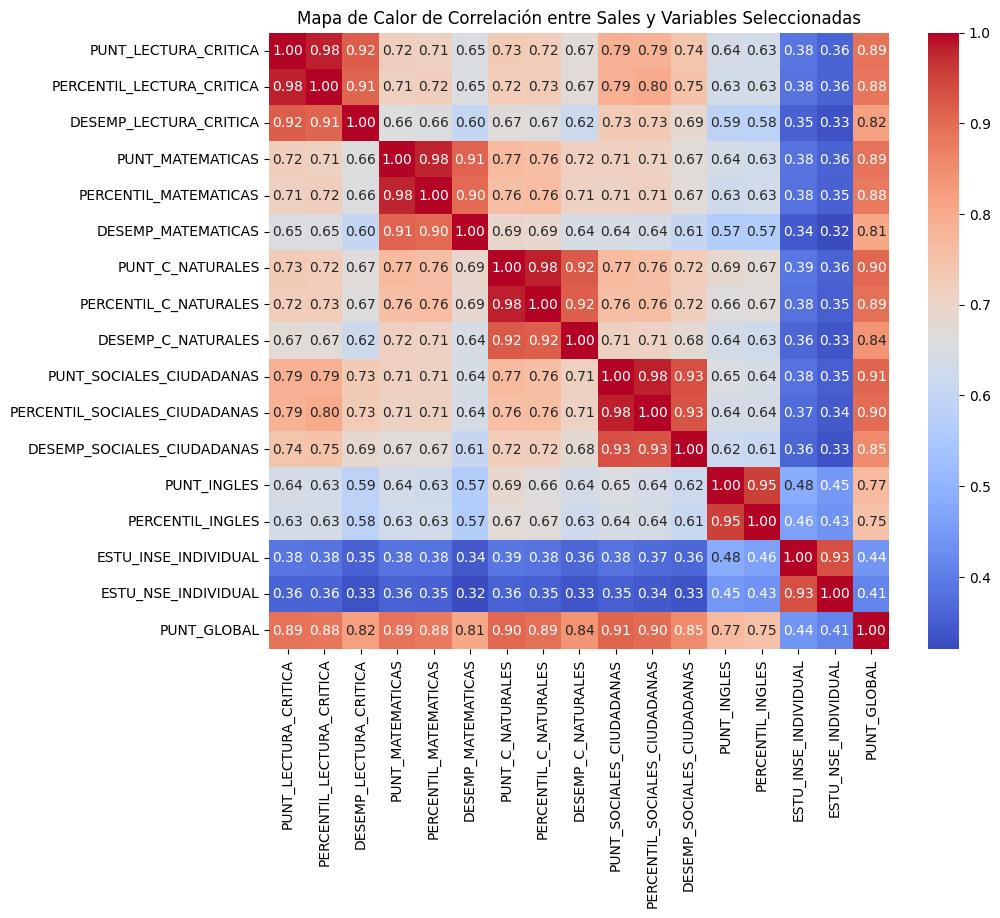

In [13]:
#Correlacion variables numericas
# Mapa de calor correlaciones
plt.figure(figsize=(10, 8))

# Variables con mayor correlación con 'Salary' basados en tablas anteriores
variables_correlacionadas = ['PUNT_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA','PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS', 'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES','PUNT_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PERCENTIL_INGLES',  'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL' ,'PUNT_GLOBAL']

# Mapa de calor de las correlaciones
sns.heatmap(df[variables_correlacionadas].corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Mapa de Calor de Correlación entre Sales y Variables Seleccionadas')
plt.show()

Auqnue es intuitivo las variables de los puntajes individuales de las diferentes areas del examen tienen una correlacion alta con la variable predictora PUNT_GLOBAL. Aunque no tiene sentido analisar la prediccion del puntaje global usando las metricas del puntaje individual de cada area del examen.

Podemos adicionar evidencair que las variables ESTU_INSE_INDIVIDUAL y ESTU_NSE_INDIVIDUAL no tiene un nivel de correlacion alto con la variable  de PUNT_GLOBAL. Adicionalmente podemos evidenciar que las variables ESTU_NSE_INDIVIDUAL y ESTU_INSE_INDIVIDUAL tienen una correlacion alta, teniendo informacion redundante debido a su nivel de correlacion y que reflejan relacion con el nivel socieconomico del estudiante. Por lo tanto solo una variable deberia analizarse para el modelo de prediccion para evitar adicionar informacion redundante al modelo. 

## Fase 3: abordar relación variables-desempeño a través de un modelo

En esta fase propondrás, implementarás y reportarás el desempeño de uno o más modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemográficos y el desempeño en la prueba. Además, concluirás con respecto a la validez de al menos un modelo y los posibles hallazgos que se podrían reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librerías especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Los módulos correspondientes a regresión lineal y regresión logística pueden ser útiles.
* Asegurar el cumplimiento de los supuestos y buenas prácticas de cada modelo.
* Utilizar las métricas de evaluación de desempeño (disponibles en las librerías especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:

* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?

## Estimación mediante regresión lineal con *Scikit Learn*

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Mapeo variables categoricas
df_encoded = df_columnas_interes.copy()
map_genero = {"M" : 1 , "F" : 0}
map_etnia = {"Si" : 1, "No" : 0}
map_cole_ubicacion = {"URBANO" : 1, "RURAL" : 0}
map_cole_genero = {"MIXTO" : 2, "FEMENINO" : 1, "MASCULINO" : 0}
df_encoded["ESTU_GENERO"] = df_encoded["ESTU_GENERO"].map(map_genero)
df_encoded["ESTU_TIENEETNIA"] = df_encoded["ESTU_TIENEETNIA"].map(map_etnia)
df_encoded["COLE_AREA_UBICACION"] = df_encoded["COLE_AREA_UBICACION"].map(map_cole_ubicacion)
df_encoded["COLE_GENERO"] = df_encoded["COLE_GENERO"].map(map_cole_genero)

columnas_lr = ['ESTU_INSE_INDIVIDUAL', 'ESTU_GENERO', 'ESTU_TIENEETNIA', 'COLE_AREA_UBICACION', 'COLE_GENERO', 'PUNT_GLOBAL']
df_lr = df_encoded[columnas_lr]

XTotal = df_lr.loc[:,df_lr.columns!="PUNT_GLOBAL"]
yTotal = df_lr.loc[:,df_lr.columns=="PUNT_GLOBAL"]

# Split train y test
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)
yTest = yTest.values


Para las predicciones del modelo de regresion se van a usar variables sociodemograficas que expliquen de mejor forma el resultado del puntaje global en las pruebas del ICFES. Las variables que se van a usar para el analisis son:

ESTU_GENERO

ESTU_TIENEETNIA

COLE_AREA_UBICACION

COLE_GENERO

ESTU_INSE_INDIVIDUAL


In [15]:
# Funcion estandarizacion de variables
def estandarizar_variables(XTrain):
    scaler = StandardScaler(with_mean=True, with_std=True)
    scaler.fit(XTrain)
    XEscaladoTrain=scaler.transform(XTrain)
    XEscaladoTrain=pd.DataFrame(XEscaladoTrain)
    return XEscaladoTrain

# Estandarizacion de variables
Xestd_train= estandarizar_variables(XTrain)
Xestd_test= estandarizar_variables(XTest)

# Entrenar modelo
modelo = linear_model.LinearRegression()
modelo.fit( Xestd_train.values, yTrain.values )

print('Coefficients:\n \t\t'+str(modelo.intercept_)+"\t"+str(modelo.coef_) )

# Predicciones del modelo
y_pred = modelo.predict(Xestd_test)

# Calcular la raíz cuadrada del error cuadrático medio (RMSE) y R2
mse_lr = mean_squared_error(yTest, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(yTest, y_pred)

print("RMSE:", rmse_lr)
print("R2:", r2_lr)



Coefficients:
 		[248.41405644]	[[19.97132402  3.1686602  -4.84216487  2.02188683 -3.26405503]]
RMSE: 44.03386595214091
R2: 0.21831207565137511


## Estimación mediante Gradient Boosting con *Scikit Learn*

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Definir los parámetros del modelo
params = {
    'n_estimators': 220,  #------------>Aumente la cantidad de ARBOLES
    'learning_rate': 0.1,
    'max_depth': 14,
    'verbose' : 1
}

# Estandarizacion de variables
Xestd_train= estandarizar_variables(XTrain)
Xestd_test= estandarizar_variables(XTest)

# Inicializar GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(**params)

# Ajustar el modelo a los datos de entrenamiento
gb_regressor.fit(Xestd_train, yTrain)

# Hacer predicciones en el conjunto de prueba
y_pred = gb_regressor.predict(Xestd_test)

# Calcular la raíz cuadrada del error cuadrático medio (RMSE) y R2
mse_gb = mean_squared_error(yTest, y_pred)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(yTest, y_pred)

print("RMSE:", rmse_gb)
print("R2:", r2_gb)


/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1        2336.3094           12.17s
         2        2204.4670           11.22s
         3        2096.5867           10.45s
         4        2007.0347           10.18s
         5        1932.4765           10.14s
         6        1868.9483           10.30s
         7        1813.5602           10.51s
         8        1761.9707           10.81s
         9        1722.3414           11.07s
        10        1688.0446           11.39s
        20        1495.7485           11.41s
        30        1415.6335           11.18s
        40        1367.2250           10.15s
        50        1331.0223            9.41s
        60        1302.3409            8.75s
        70        1279.0342            8.10s
        80        1259.3226            7.50s
        90        1235.2088            6.91s
       100        1212.9962            6.35s
       200        1022.0120            1.04s
RMSE: 46.57673587349118
R2: 0.12542336586547465


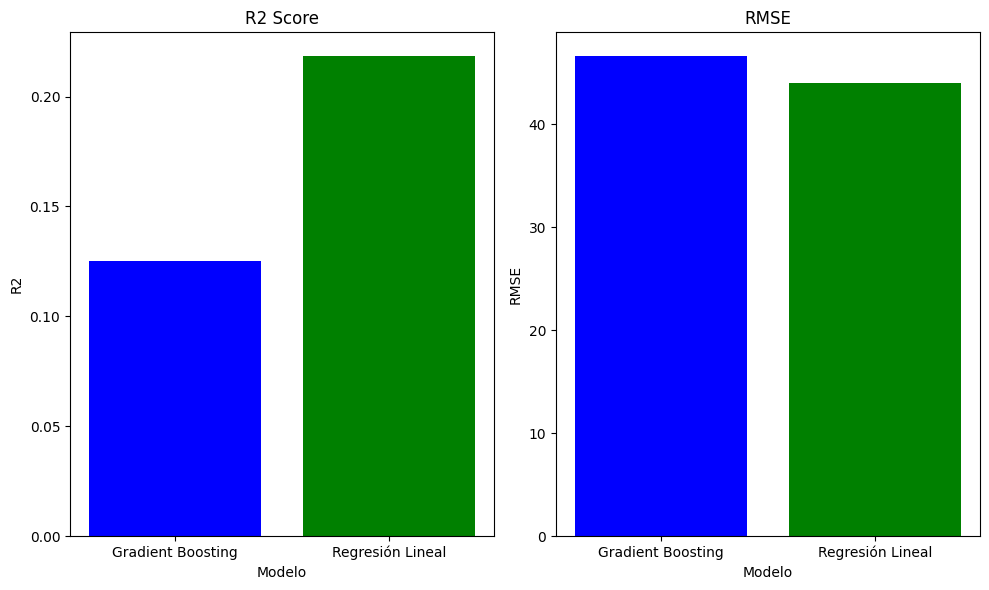

In [17]:
# Valores de R2 y RMSE para Gradient Boosting y Regresión Lineal
r2_values = [r2_gb, r2_lr]
rmse_values = [rmse_gb, rmse_lr]
models = ['Gradient Boosting', 'Regresión Lineal']

# Graficar las métricas
plt.figure(figsize=(10, 6))

# Gráfico de barras para R2
plt.subplot(1, 2, 1)
plt.bar(models, r2_values, color=['blue', 'green'])
plt.title('R2 Score')
plt.xlabel('Modelo')
plt.ylabel('R2')

# Gráfico de barras para RMSE
plt.subplot(1, 2, 2)
plt.bar(models, rmse_values, color=['blue', 'green'])
plt.title('RMSE')
plt.xlabel('Modelo')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()


Como se puede evidenciar el desempeño del modelo de Regresion Lineal tiene un desempeño mejor que el modelo de GradientBoosting. Para el modelo de regresion lineal se tiene un valor de RMSE de 44.14 y un R2 de 0.21. Las varibles que se seleccionaron para los modelos de regresion tienen una capacidad de poder predecir relativamente bien el resultado del examen del Icfes. Como se evidencia en los coficientes de la regresion lineal:

[248.23390609]	[[19.90575055  3.00916482 -4.96880769  2.23797887 -3.35495475]]

$y = b_0 + b_1 x_1 + b_2 x_2 + b_3 x_3$

Se tiene un interpecto de 248.2 y la variable que mas peso tiene de acuerdo a la estimacion del modelo de regresion lineal es ESTU_GENERO.

Podemos ver por lo tanto que las variables ESTU_GENERO, ESTU_TIENEETNIA, COLE_AREA_UBICACION, COLE_GENERO, ESTU_INSE_INDIVIDUAL sirven para predecir el puntaje obtenido por un estudiante en las pruebas del ICFES. 

## Fase 4

Deberás elegir y realizar una de las dos alternativas que se encuentran a continuación.

### Alternativa 1: desarrollar una herramienta interactiva de análisis

En esta fase desarrollarás, a partir de alguno de los análisis realizados, una herramienta interactiva que sea relevante en el contexto del problema, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

Pautas generales:

* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar el/los parámetro(s) que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar una librería especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

Preguntas guía:

* ¿Cuál o cuáles preguntas podrá hacerle el usuario a la herramienta y cómo aporta la respuesta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta?

## Estadisticas descriptivas con ipywidgets

Se crea una herramienta de filtrado para que el usuario pueda ver las estadisticas de los resultados del examen filtrando por criterios de interes: "ESTU_NSE_INDIVIDUAL",  "ESTU_NACIONALIDAD", "ESTU_GENERO", "ESTU_TIENEETNIA", "ESTU_ETNIA", "ESTU_DEPTO_RESIDE", "FAMI_ESTRATOVIVIENDA", "FAMI_TIENEINTERNET", "FAMI_TIENECOMPUTADOR", "COLE_BILINGUE"


Con esta herramienta el usuario podra analizar, dependiendo del criterio o criterios de ineteres, los resultados del examen por area y puntaje total. Se debe seleccionar los filtros de interes que se quieran analizar y la herramienta filtrara automaticamente el dataframe para mostrar los valores asociados a los filtros indicados

In [ ]:
# Estadisticas descriptivas filtrando por valores de interes
from ipywidgets import interact, widgets
import pandas as pd
import matplotlib.pyplot as plt

lista_colum = ['PERIODO', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL','ESTU_NSE_INDIVIDUAL',  "ESTU_NACIONALIDAD", "ESTU_GENERO", "ESTU_TIENEETNIA", "ESTU_ETNIA", "ESTU_DEPTO_RESIDE", "FAMI_ESTRATOVIVIENDA", "FAMI_TIENEINTERNET", "FAMI_TIENECOMPUTADOR", "COLE_BILINGUE"]
def filtrar_datos(periodo, nacionalidad, nse, genero, tiene_etnia, etnia, depto_reside, estrato_vivienda, tiene_internet, tiene_computador, colegio_bilingue):
    df_filtrado = df[lista_colum].copy()  # Hacer una copia del DataFrame original para evitar modificaciones no deseadas
    if periodo:
        df_filtrado = df_filtrado[df_filtrado['PERIODO'] == periodo]
    if nacionalidad:
        df_filtrado = df_filtrado[df_filtrado['ESTU_NACIONALIDAD'] == nacionalidad]
    if nse:
        df_filtrado = df_filtrado[df_filtrado['ESTU_NSE_INDIVIDUAL'] == nse]
    if genero:
        df_filtrado = df_filtrado[df_filtrado['ESTU_GENERO'] == genero]
    if tiene_etnia:
        df_filtrado = df_filtrado[df_filtrado['ESTU_TIENEETNIA'] == tiene_etnia]
    if etnia:
        df_filtrado = df_filtrado[df_filtrado['ESTU_ETNIA'] == etnia]
    if depto_reside:
        df_filtrado = df_filtrado[df_filtrado['ESTU_DEPTO_RESIDE'] == depto_reside]
    if estrato_vivienda:
        df_filtrado = df_filtrado[df_filtrado['FAMI_ESTRATOVIVIENDA'] == estrato_vivienda]
    if tiene_internet:
        df_filtrado = df_filtrado[df_filtrado['FAMI_TIENEINTERNET'] == tiene_internet]
    if tiene_computador:
        df_filtrado = df_filtrado[df_filtrado['FAMI_TIENECOMPUTADOR'] == tiene_computador]
    if colegio_bilingue:
        df_filtrado = df_filtrado[df_filtrado['COLE_BILINGUE'] == colegio_bilingue]
        
    # Generar descripción estadística del DataFrame filtrado
    df_describe = df_filtrado.drop(columns=['PERIODO']).describe()
    datos_seleccionados = df_describe.iloc[0,0]
    df_describe = df_describe.drop(index='count')
    
    # Crear una figura y varios ejes
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico de barras de la descripción estadística
    df_describe.plot(kind='bar', ax=axs[0], colormap='viridis')
    axs[0].set_title('Descripción Estadística del DataFrame Filtrado')
    axs[0].set_ylabel('Valor')
    axs[0].set_xlabel('Estadística')

    # Graficar el primer valor como una barra
    axs[1].bar(0, datos_seleccionados, color='blue')  # Barra azul en la posición 0
    axs[1].set_xticks([])  # Eliminar marcas del eje x
    axs[1].set_ylabel('Valor')
    axs[1].set_title('Total de datos seleccionados')

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

    return df_filtrado.drop(columns=['PERIODO']).describe()

# Obtener opciones únicas para cada columna
PERIODO = [''] + list(df['PERIODO'].unique())
ESTU_NACIONALIDAD = [''] + list(df['ESTU_NACIONALIDAD'].unique())
ESTU_NSE_INDIVIDUAL = [''] + list(df['ESTU_NSE_INDIVIDUAL'].unique())
ESTU_GENERO = [''] + list(df['ESTU_GENERO'].unique())
ESTU_TIENEETNIA = [''] + list(df['ESTU_TIENEETNIA'].unique())
ESTU_ETNIA = [''] + list(df['ESTU_ETNIA'].unique())
ESTU_DEPTO_RESIDE = [''] + list(df['ESTU_DEPTO_RESIDE'].unique())
FAMI_ESTRATOVIVIENDA = [''] + list(df['FAMI_ESTRATOVIVIENDA'].unique())
FAMI_TIENEINTERNET = [''] + list(df['FAMI_TIENEINTERNET'].unique())
FAMI_TIENECOMPUTADOR = [''] + list(df['FAMI_TIENECOMPUTADOR'].unique())
COLE_BILINGUE = [''] + list(df['COLE_BILINGUE'].unique())

interact(filtrar_datos,
         periodo=widgets.Dropdown(options=PERIODO, description='Periodo:'),
         nacionalidad=widgets.Dropdown(options=ESTU_NACIONALIDAD, description='Nacionalidad:'),
         nse=widgets.Dropdown(options=ESTU_NSE_INDIVIDUAL, description='NSE Individual:'),
         genero=widgets.Dropdown(options=ESTU_GENERO, description='Genero:'),
         tiene_etnia=widgets.Dropdown(options=ESTU_TIENEETNIA, description='¿Tiene etnia?:'),
         etnia=widgets.Dropdown(options=ESTU_ETNIA, description='Etnia:'),
         depto_reside=widgets.Dropdown(options=ESTU_DEPTO_RESIDE, description='Departamento de residencia:'),
         estrato_vivienda=widgets.Dropdown(options=FAMI_ESTRATOVIVIENDA, description='Estrato de vivienda:'),
         tiene_internet=widgets.Dropdown(options=FAMI_TIENEINTERNET, description='¿Tiene internet?:'),
         tiene_computador=widgets.Dropdown(options=FAMI_TIENECOMPUTADOR, description='¿Tiene computador?:'),
         colegio_bilingue=widgets.Dropdown(options=COLE_BILINGUE, description='Colegio bilingüe:'))


interactive(children=(Dropdown(description='Periodo:', options=('', 20194, 20204), value=''), Dropdown(descrip…

<function __main__.filtrar_datos(periodo, nacionalidad, nse, genero, tiene_etnia, etnia, depto_reside, estrato_vivienda, tiene_internet, tiene_computador, colegio_bilingue)>

## Dashboard usando el paquete Panel

Se desarrolla un dashboard para que el usuario pueda filtrar el departamento de interes y pueda conocer el valor pormedio de los puntajes del examen del Icfes. Adicionalmente el usuario podra diferenciar entre Mujeres, Hombres, o personas que no respondieron el genero. Este dashboard presenta un diagrama de barras horizontal.
Se tiene la opcion tanto para el genero como para el departamento de no seleccionar ninguno y poder ver los valores generales. 
De esta forma el usuario de forma rapida podra conocer el desempeño de los estudiantes en la prueba para un departamento especifico.

In [20]:
import panel as pn
import pandas as pd
import plotly.graph_objects as go
pn.extension('plotly')

# Crear un DataFrame de ejemplo
data = {
    'ESTU_DEPTO_RESIDE': ['Antioquia', 'Bogotá', 'Antioquia', 'Bogotá', 'Antioquia'],
    'ESTU_GENERO': ['F', 'M', 'F', 'M', 'F'],
    'PUNT_GLOBAL': [250, 260, 270, 280, 290]
}
df2 = df.copy()

# Crear los widgets para el filtro por departamento y género
departamentos = ['Todos'] + df2['ESTU_DEPTO_RESIDE'].unique().tolist()
filtro_departamento = pn.widgets.Select(name='Departamento', options=departamentos, value='Todos')

generos = ['Todos'] + df2['ESTU_GENERO'].unique().tolist()
filtro_genero = pn.widgets.Select(name='Género', options=generos, value='Todos')

# Definir la función para actualizar el gráfico
@pn.depends(filtro_departamento.param.value, filtro_genero.param.value)
def actualizar_grafico(depto, genero):
    df_filtrado = df2.copy()

    if depto != 'Todos':
        df_filtrado = df_filtrado[df_filtrado['ESTU_DEPTO_RESIDE'] == depto]

    if genero != 'Todos':
        df_filtrado = df_filtrado[df_filtrado['ESTU_GENERO'] == genero]

    promedio_por_departamento = df_filtrado.groupby('ESTU_DEPTO_RESIDE')['PUNT_GLOBAL'].mean().reset_index()

    fig = go.Figure(go.Bar(
        x=promedio_por_departamento['PUNT_GLOBAL'],
        y=promedio_por_departamento['ESTU_DEPTO_RESIDE'],
        orientation='h'
    ))

    fig.update_layout(
        title='Promedio de PUNT_GLOBAL por Departamento',
        xaxis_title='Promedio de PUNT_GLOBAL',
        yaxis_title='Departamento'
    )

    return fig

dashboard = pn.Column(
    pn.Row(filtro_departamento, filtro_genero),
    actualizar_grafico
)

dashboard.servable()


BokehModel(combine_events=True, render_bundle={'docs_json': {'be0357db-ef91-40a6-bb56-64af88183d6d': {'version…

### Alternativa 2: registrar en bases de datos relacionales con PySpark

En esta fase desarrollarás, a partir de alguno de los análisis realizados, un _script_ que sea relevante en el contexto del problema, acompañado de las instrucciones necesarias para que un usuario lo pueda ejecutar.

Pautas generales:

* Cargar en una base de datos relacional (tipo SQL) el segmento de los datos sobre el cual profundizaste en tu anális, utilizando una tabla distinta para cada categoría de campos. Por ejemplo, una categoría puedes ser información del colegio; en cuyo caso, una tabla debería contener un registro único para cada colegio y todos los campos asociados.

* Los campos, a excepción de los identificadores, deben existir en un única tabla.

* Cada registro debe existir una única vez en su respectiva tabla.

* Cada registro debe tener un identificador único en su tabla, el cual establece una relación entre tablas.

* Seleccionar uno de los modelos predictivos implementados.

* Crear en la base de datos relacional una tabla que contenga únicamente los identificadores del registro y la predicción de la variable de respuesta hecha por el modelo.

* Desarrollar _queries_ de SQL según las siguientes indicaciones y concluir acerca de los resultados:
    * Un _query_ que seleccione todos registros y los agregue en una única tabla. Para esto debes relacionar las tablas por su identificador, utilizando el método `JOIN`.
    * Un _query_ que contenga el puntaje promedio de los estudiantes, agrupado por año y por colegio.
    * Distintos _queries_ que calculen medidas de error de predicción del modelo a partir de los datos reales y las predicciones respectivas. Debes reportar el error para cada registro, el error total de los registros de entrenamiento y el error total de los registros de prueba.
    * Haz dos _queries_ adicionales que resulten interesantes.

Preguntas guía:

* ¿Cómo aporta la segmentación de los datos en categorías de campos al manejo de los datos?
* ¿Qué filtros y agrupaciones podemos aplicar sobre los datos con el fin de obtener información relevante?

In [ ]:
# Implementa tu respuesta en esta celda


## Referencias

*  J. VanderPlas (2016) *Python Data Science Handbook: Essential Tools for Working with Data* O'Reilly Media, Inc.
*  scikit-learn developers . (2020). Demo of DBSCAN clustering algorithm. 11 Diciembre 2020, de scikit-learn <br> https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Créditos

__Autores__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Jose Fernando Barrera de Plaza, Diego Alejandro Cely Gómez.

__Fecha última actualización__: 29/09/2022